# **Title**: Analyzing Portuguese Bank's Direct Marketing for Term Deposits

# **PROBLEM** **OF** **STATEMENT**


* Prepare a complete data analysis report on the given data.
* Create a predictive model which will help the bank marketing team to know which customer will buy the product.

* Suggestions to the Bank market team to make  customers  buy the product.


# **Source Information:**

Dataset Origin: The dataset is provided by a Portuguese banking institution and covers direct phone call marketing campaigns conducted between May 2008 and November 2010.

# **Description**

Absolutely, here's a well-structured presentation of the attribute information for better clarity:

**Input Variables:**

1. **Age:** Numeric variable representing the age of the client.
2. **Job:** Categorical variable indicating the type of job. Categories include admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, and unknown.
3. **Marital:** Marital status of the client. Categories include divorced, married, single, and unknown (which can also represent widowed clients).
4. **Education:** Categorical variable describing the client's education level. Categories include basic education levels (4y, 6y, 9y), high school, illiterate, professional course, university degree, and unknown.
5. **Default:** Indicates if the client has credit in default. Categories are no, yes, and unknown.
6. **Housing:** Indicates if the client has a housing loan. Categories are no, yes, and unknown.
7. **Loan:** Indicates if the client has a personal loan. Categories are no, yes, and unknown.

**Attributes Related to the Last Contact of the Current Campaign:**

8. **Contact:** Communication type used to contact the client. Categories include cellular and telephone.
9. **Month:** Last contact month of the year. Categories include January to December.
10. **Day_of_week:** Last contact day of the week. Categories include Monday to Friday.
11. **Duration:** Duration of the last contact in seconds. Note: This attribute strongly influences the target, and its value is only known after the call. It's recommended for benchmarking purposes and can be omitted from a predictive model.

**Other Attributes:**

12. **Campaign:** Number of contacts performed during this campaign for the client, including the last contact.
13. **Pdays:** Number of days passed after the client was last contacted from a previous campaign. 999 represents clients not contacted previously.
14. **Previous:** Number of contacts performed before this campaign for the client.
15. **Poutcome:** Outcome of the previous marketing campaign. Categories are failure, nonexistent, and success.

**Social and Economic Context Attributes:**

16. **Emp.var.rate:** Quarterly employment variation rate indicator (numeric).
17. **Cons.price.idx:** Monthly consumer price index indicator (numeric).
18. **Cons.conf.idx:** Monthly consumer confidence index indicator (numeric).
19. **Euribor3m:** Daily euribor 3 month rate indicator (numeric).
20. **Nr.employed:** Quarterly number of employees indicator (numeric).

**Output Variable (Target):**

21. **Y:** Binary variable indicating whether the client subscribed to a term deposit. Categories are yes and no.


# **Task 1 : Prepare a complete data analysis report on the given data.**

## **Import Basic Libraries**

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [188]:
data=pd.read_csv("bank-additional-full.csv")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **Domain Analysis**


 **Domain Analysis: Marketing Campaign for Term Deposit Subscription**

The dataset contains information related to a marketing campaign conducted by a bank to promote term deposit subscriptions. The bank aims to understand various factors influencing clients' decisions to subscribe to term deposits. Below is a comprehensive analysis of the attributes and their significance within this domain:

1. **Age:**
   - The age of clients is a key demographic factor influencing subscription decisions.
   - Different age groups might have varying financial goals and willingness to invest.

2. **Job:**
   - Occupation plays a role in determining disposable income and financial stability.
   - Job categories provide insights into the types of clients targeted by the campaign.

3. **Marital Status:**
   - Marital status could impact financial responsibilities and decisions.
   - Understanding marital status helps in tailoring marketing strategies.

4. **Education:**
   - Education level indicates clients' potential understanding of financial products.
   - Highly educated clients might have more knowledge about investment options.

5. **Default, Housing, Loan:**
   - These attributes reveal clients' financial obligations and credit history.
   - Financial stability influences the decision to invest in term deposits.

6. **Contact, Month, Day of Week:**
   - Communication type, month, and day of week impact clients' response rates.
   - Timing and mode of contact can affect the success of the campaign.

7. **Duration:**
   - Duration of the last contact can indicate the depth of client engagement.
   - Longer conversations might indicate a higher likelihood of subscription.

8. **Campaign, Pdays, Previous, Poutcome:**
   - These attributes relate to clients' interaction history with previous campaigns.
   - Understanding past interactions helps in optimizing contact strategies.

9. **Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed:**
   - Economic indicators reflect the broader financial context during the campaign.
   - Economic conditions can influence clients' willingness to invest.

10. **Y (Output Variable):**
    - The target variable indicates whether a client subscribed to a term deposit.
    - This binary outcome measures the campaign's success and client interest.

**Insights from Domain Analysis:**

- Clients' age, job, marital status, education, and financial status are crucial factors in subscription decisions.
- The timing and method of contact can significantly impact clients' responses.
- Clients with previous campaign interactions might have varying subscription behaviors.
- Economic indicators provide context for understanding the campaign's outcomes.

**Note:**
The "duration" attribute should be used carefully due to its potential data leakage (information not known before the call). It's recommended to exclude this attribute from predictive models intended for real-world applications.

This domain analysis sets the stage for exploring the dataset's insights, making informed decisions about feature selection, and building predictive models to optimize future marketing campaigns for term deposit subscriptions.

## **Basic Checks**

In [189]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [190]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [191]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [193]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [194]:
cat_data=data.select_dtypes(include=["O"]).columns
cat_data

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [195]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital ['married' 'single' 'divorced' 'unknown']
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default [

In [196]:
num_data=data.select_dtypes(include=["int64","float64"]).columns
num_data

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

# **Exploratory Data Analysis**
* **Univariate Analysis**
* **Bivariate Analysis**
* **Multivarite Analysis**

## **Univariate Analysis**

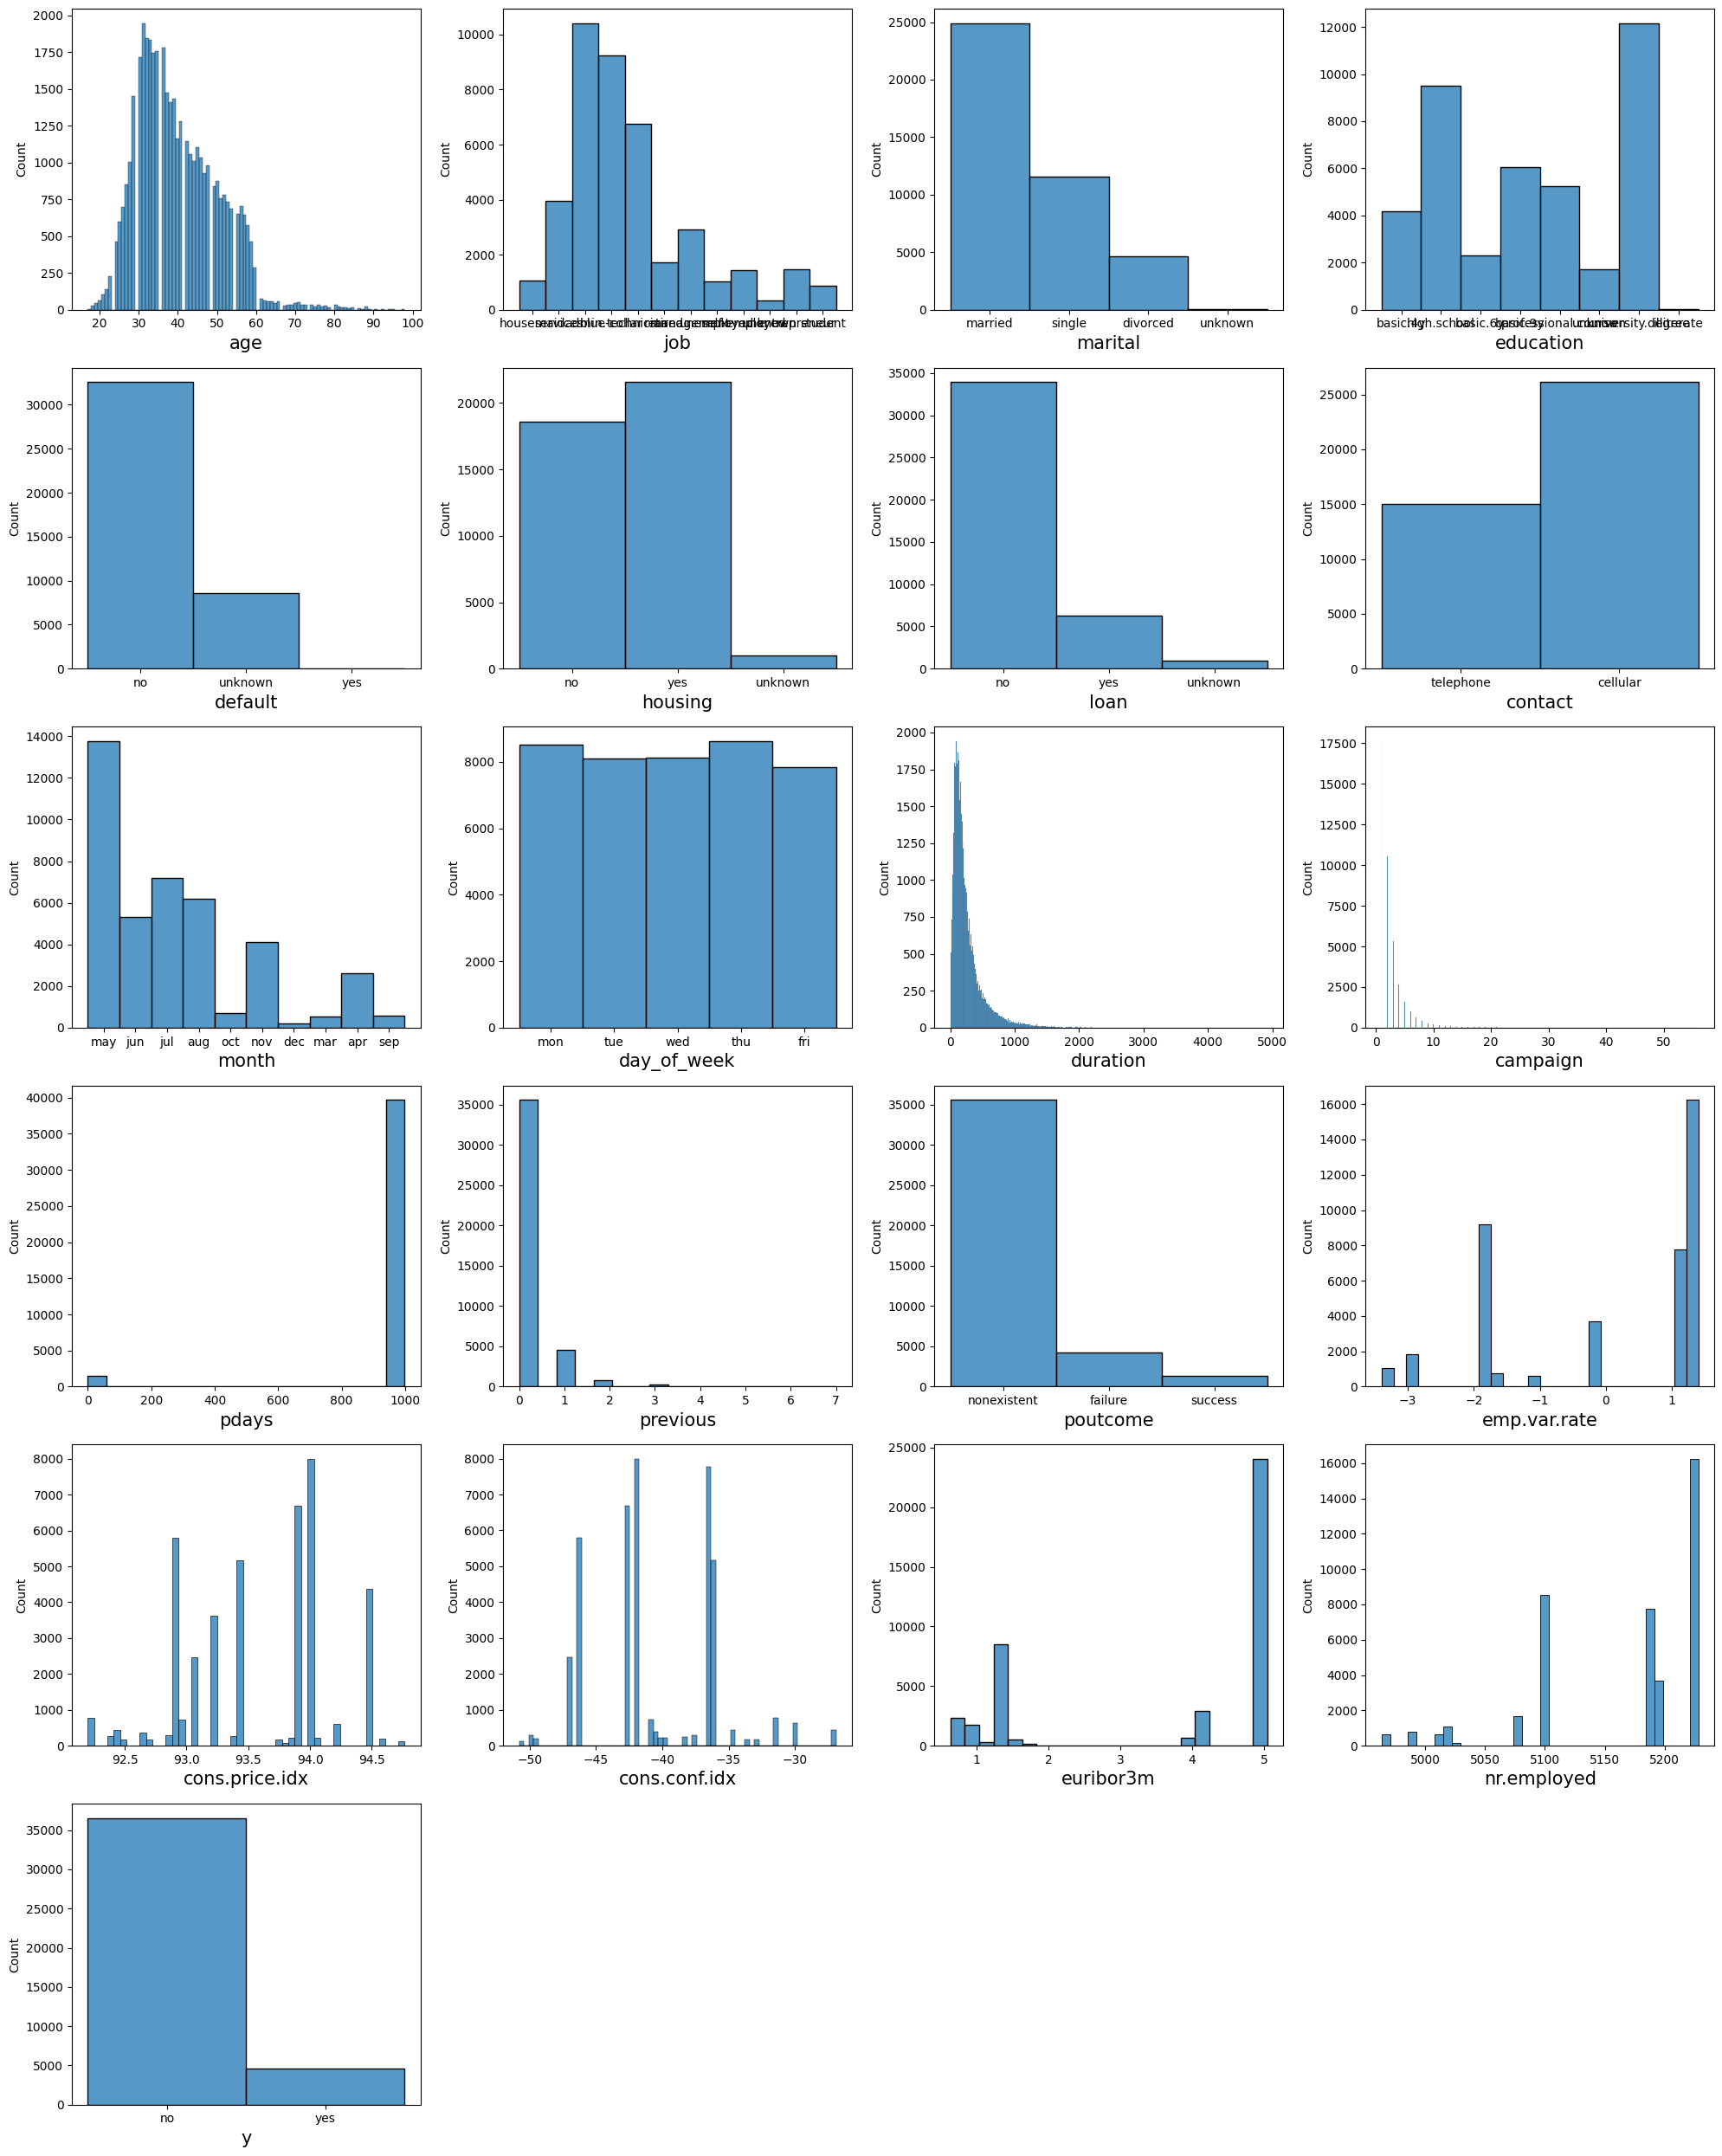

In [197]:
plt.figure(figsize=(20,25),facecolor=("white"))
plotnumber=1

for column in data:
  if plotnumber<22:
    ax=plt.subplot(6,4,plotnumber)
    sns.histplot(x=data[column])
    plt.xlabel(column,fontsize=15)

  plotnumber+=1
plt.tight_layout()


## **Insights**



 **Loan and Housing Status Influence:**
   - Customers without existing loans and housing tend to be more interested in the campaign, possibly due to financial flexibility and lower commitments.
   - The subscription rate is lower among those with existing loans or housing, indicating potential budget constraints.

 **Day of Week Contact Patterns:**
   - The campaign is most active on Thursdays and Mondays, suggesting these days are strategically chosen for customer outreach.
   - Fridays witness slightly fewer contacts, which might be due to people preparing for the weekend.

 **Duration of Last Contact Impact:**
   - Longer conversations during the last contact contribute to a higher subscription rate.
   - This highlights the importance of engaging and informative conversations.


 **Number of Contacts in Current Campaign:**
   - As the number of contacts in the current campaign increases, the subscription rate decreases.
   - This indicates that excessive contacts might lead to disinterest or annoyance among customers.

 **Effect of Days Since Last Contact (pdays):**
   - A longer time since the last contact generally leads to a higher subscription rate.
   - This suggests that maintaining appropriate gaps between contacts can yield better results.

 **Subscription Rate Across Job Categories:**
   - Students and retired individuals are more likely to subscribe to the campaign, possibly due to more flexible schedules or financial security.
   - Blue-collar workers show relatively lower interest, which might be due to work-related factors.

 **Marital Status Impact:**
   - Single individuals exhibit a slightly higher subscription rate compared to married or divorced individuals.
   - This might be because singles have more disposable income or fewer financial responsibilities.

**Education Level's Role:**
   - Customers with university degrees are more likely to subscribe, indicating a positive correlation between education level and interest.
   - Individuals with basic education levels have a lower subscription rate, possibly due to varying financial priorities.



## **Bivariate**

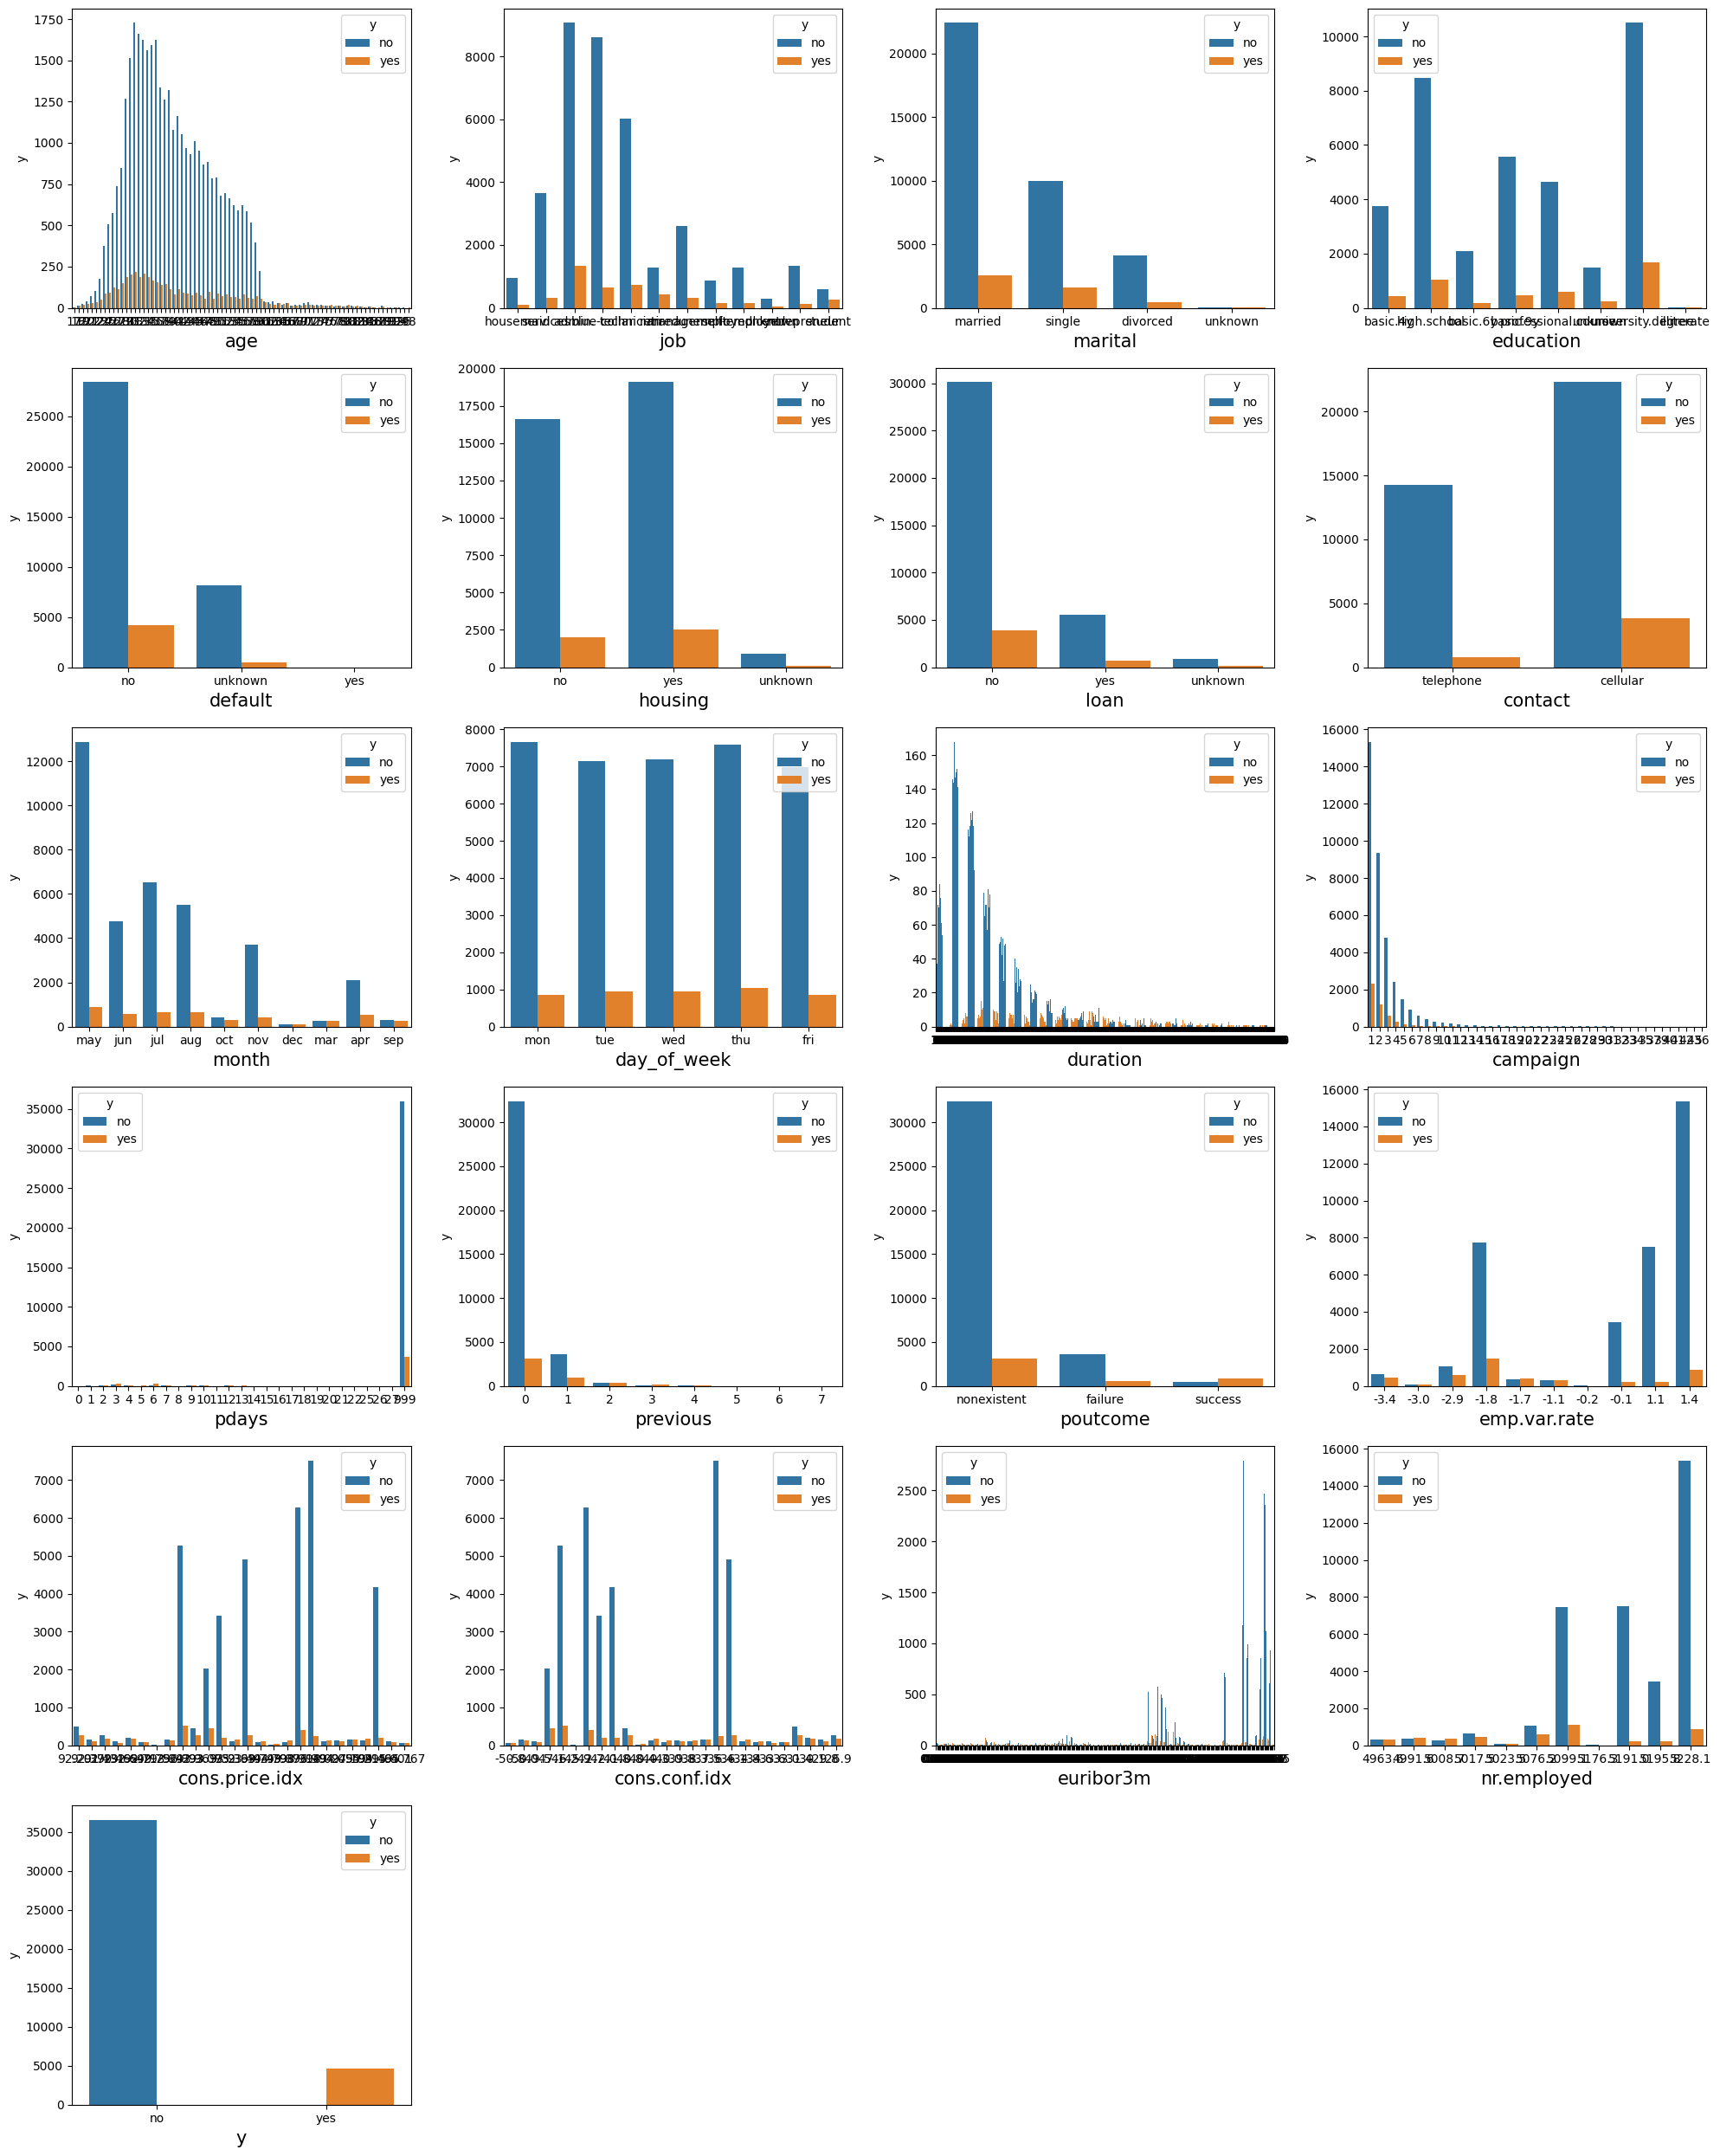

In [198]:
plt.figure(figsize=(20,25),facecolor=("white"))
plotnumber=1

for column in data:
  if plotnumber<22:
    ax=plt.subplot(6,4,plotnumber)
    sns.countplot(data=data,x=data[column],hue=data.y)
    plt.xlabel(column,fontsize=15)
    plt.ylabel("y")
  plotnumber+=1
plt.tight_layout()


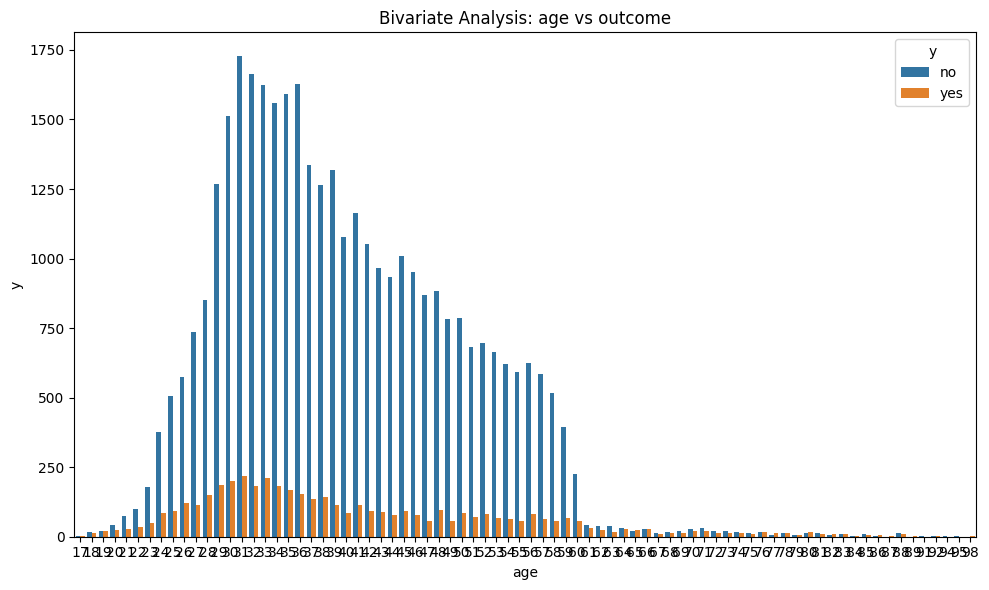

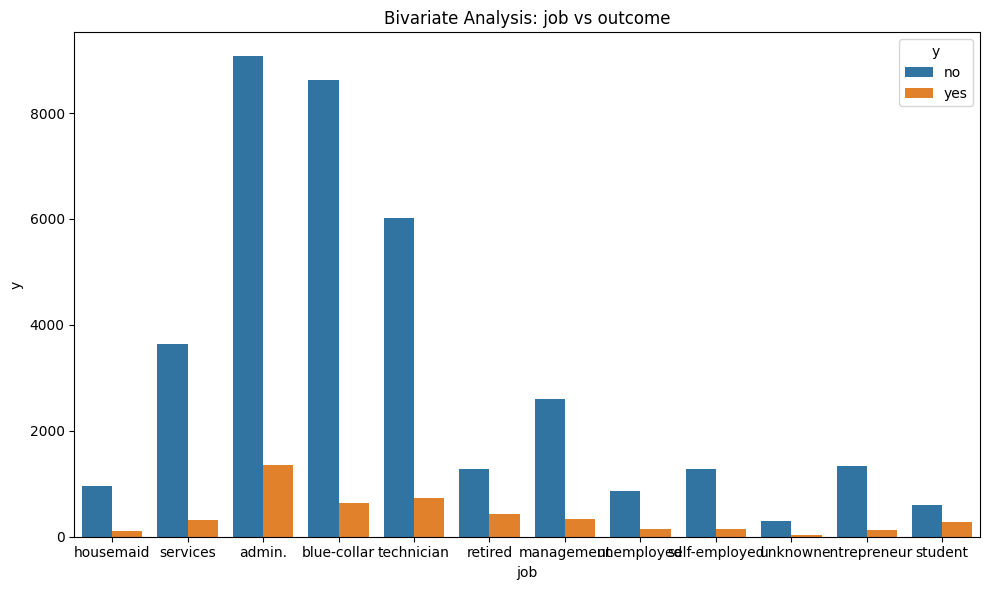

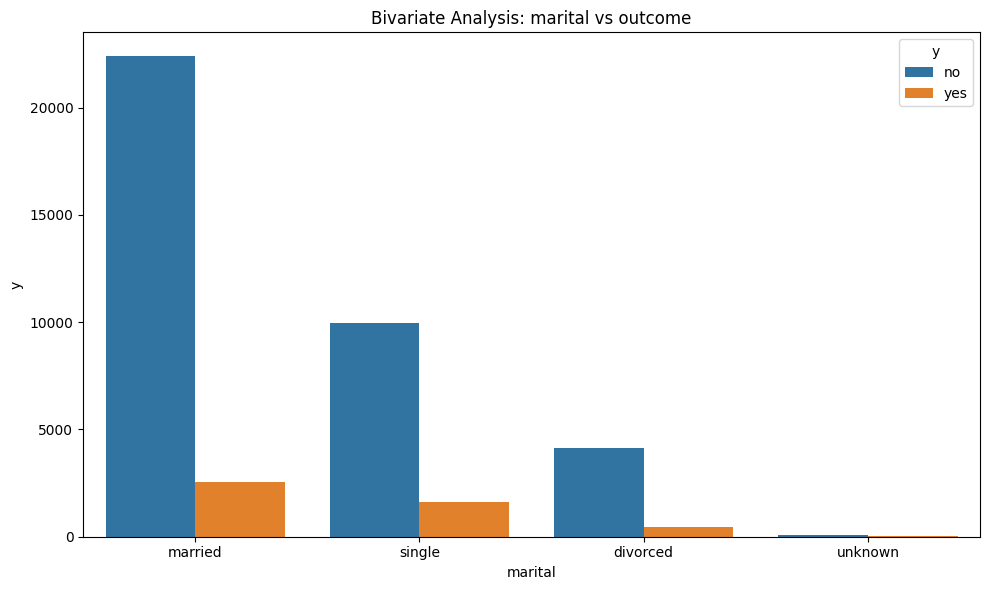

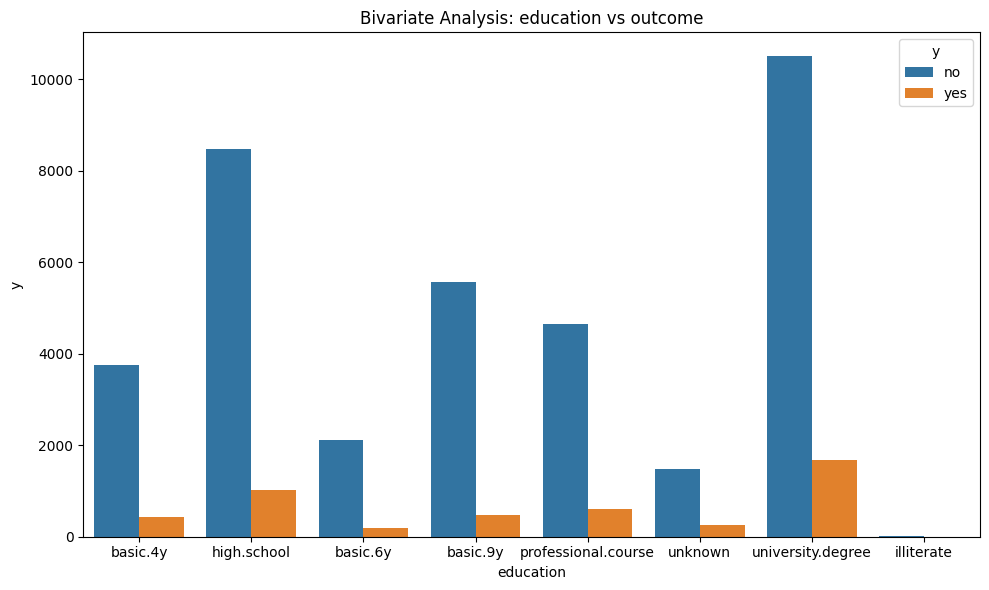

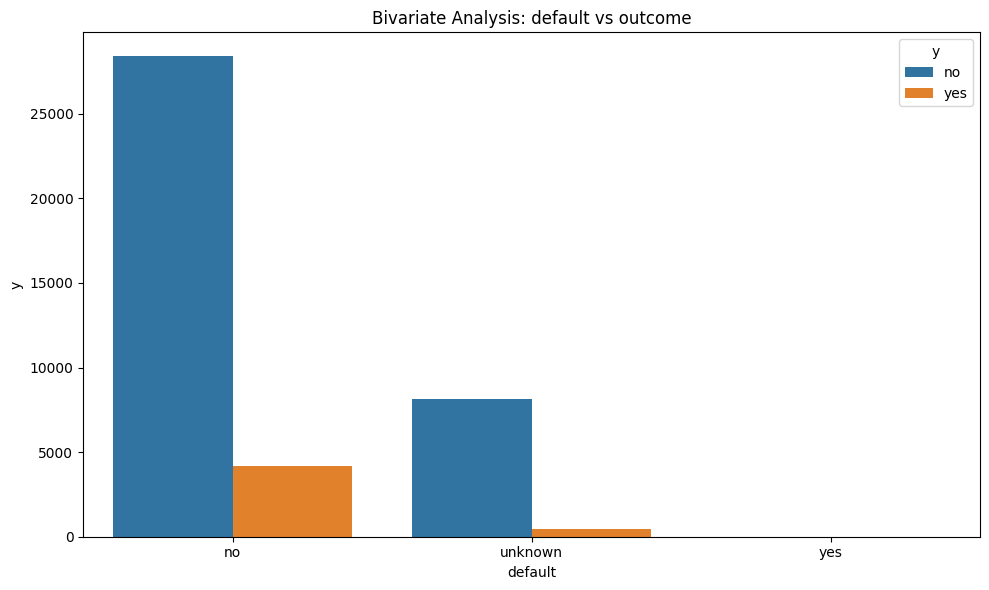

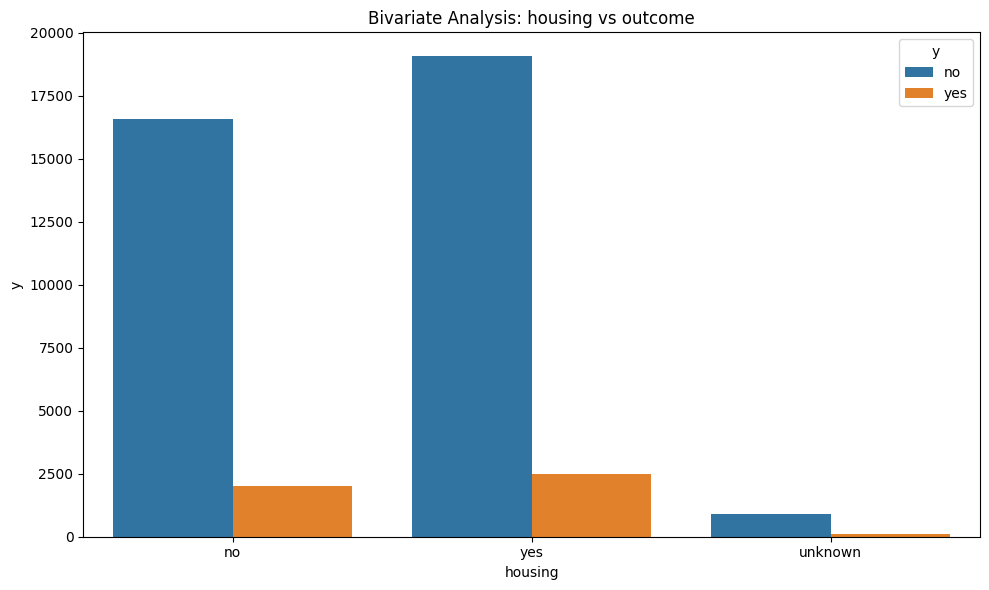

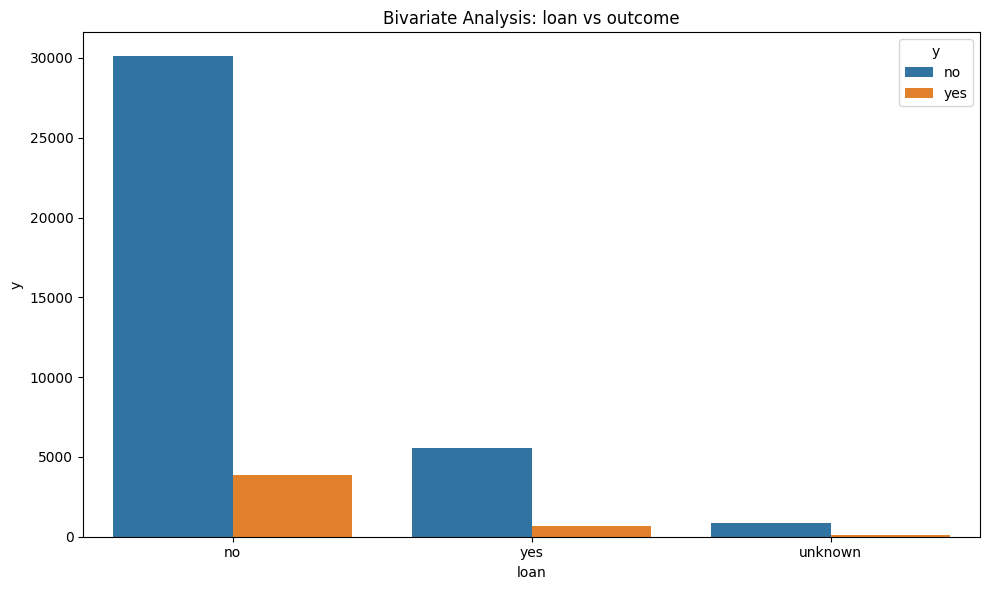

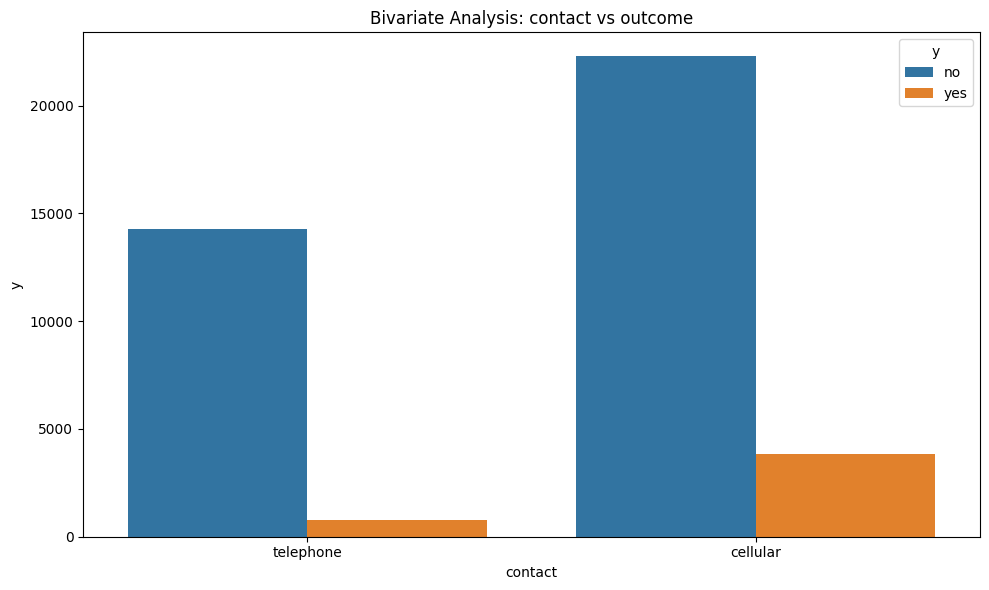

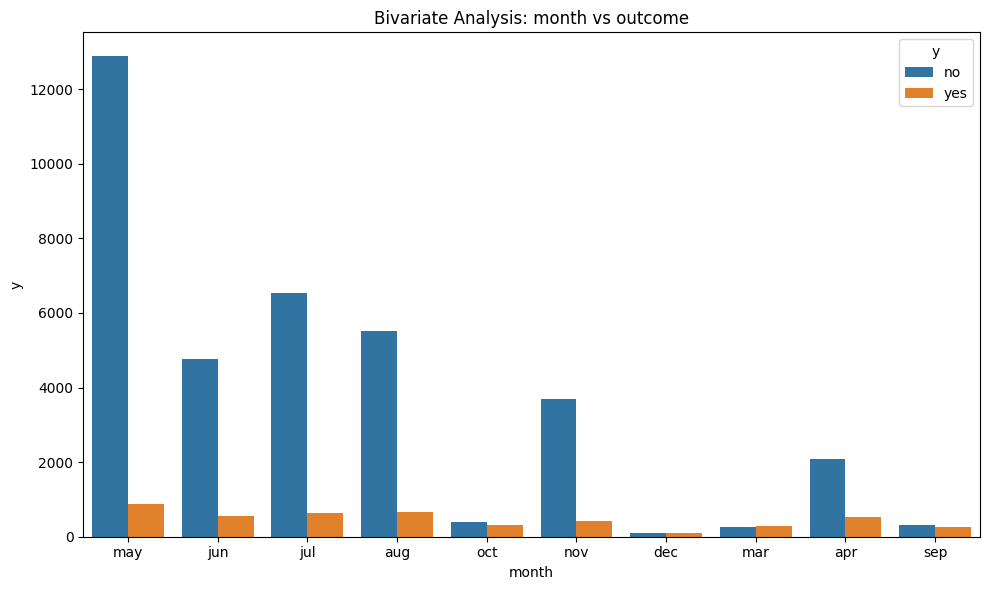

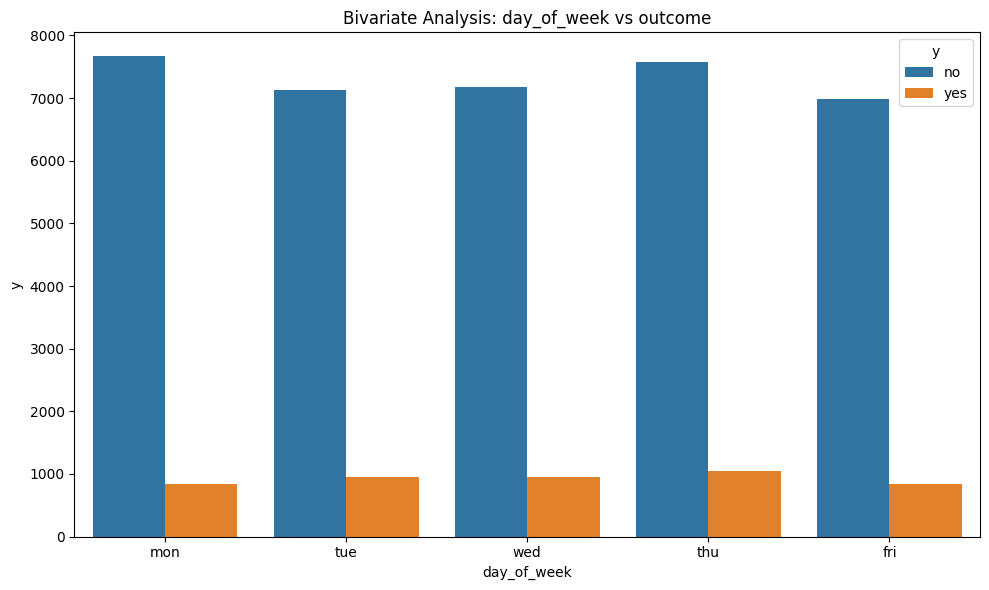

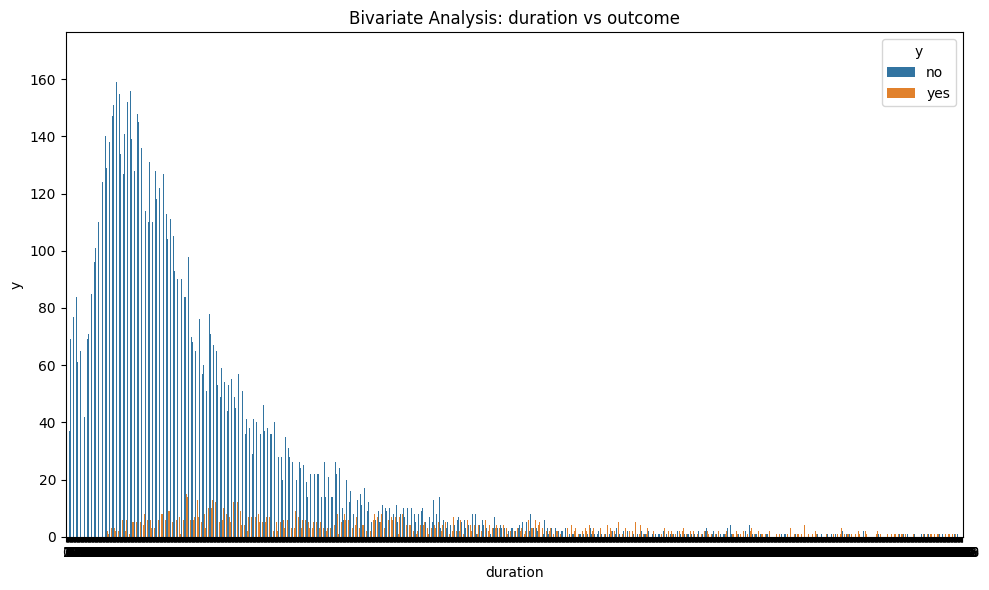

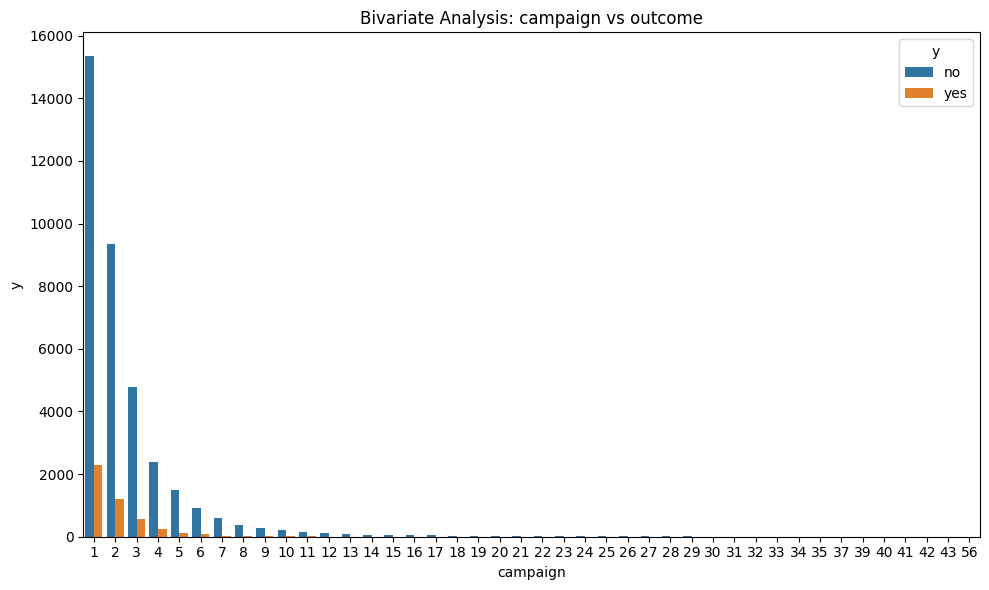

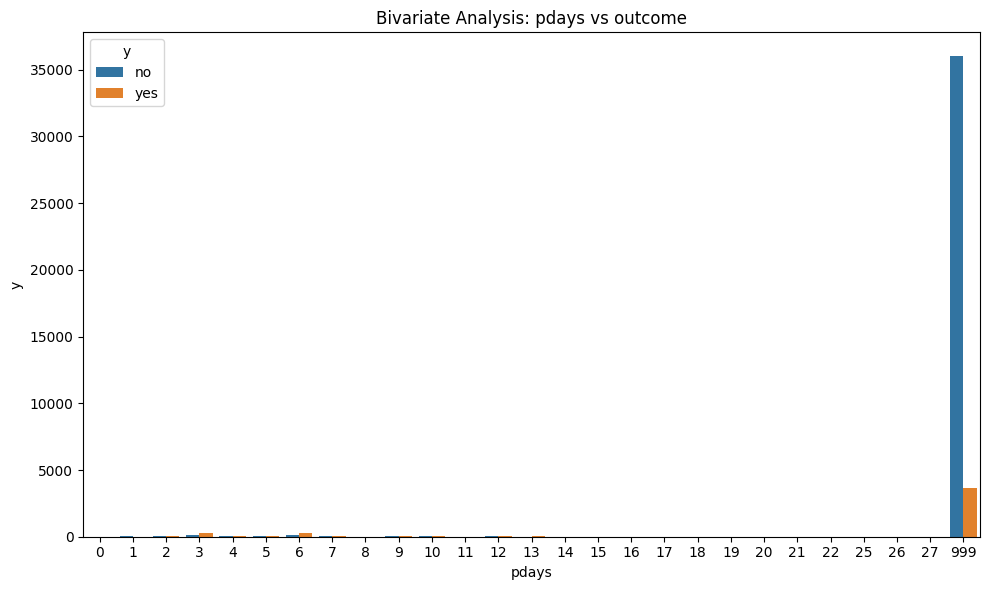

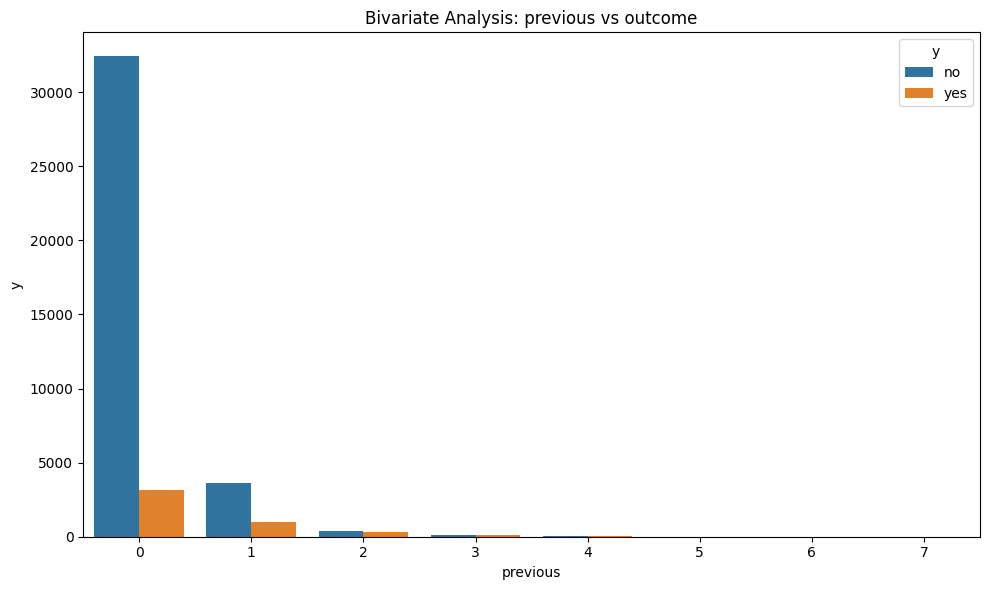

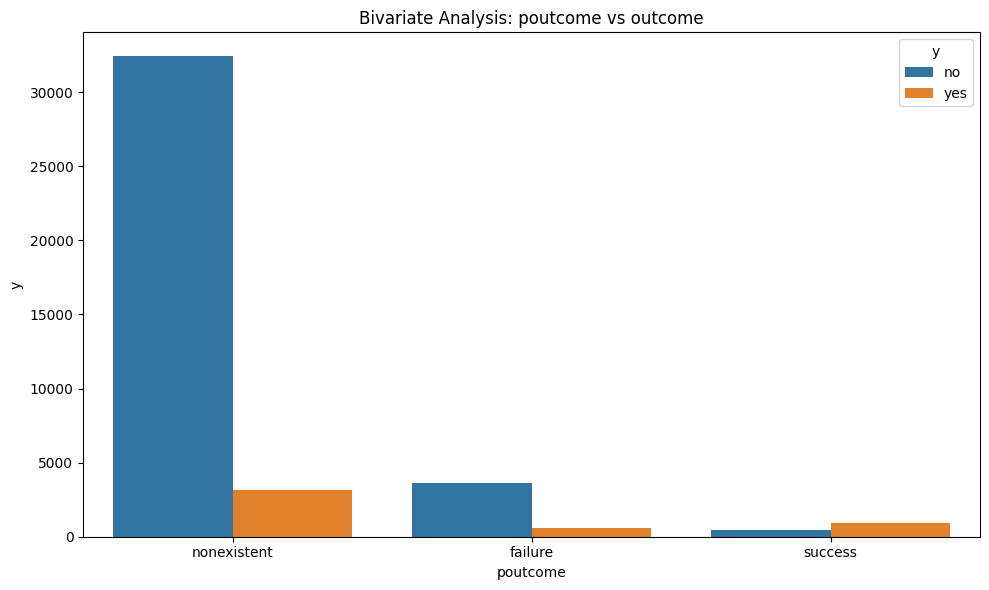

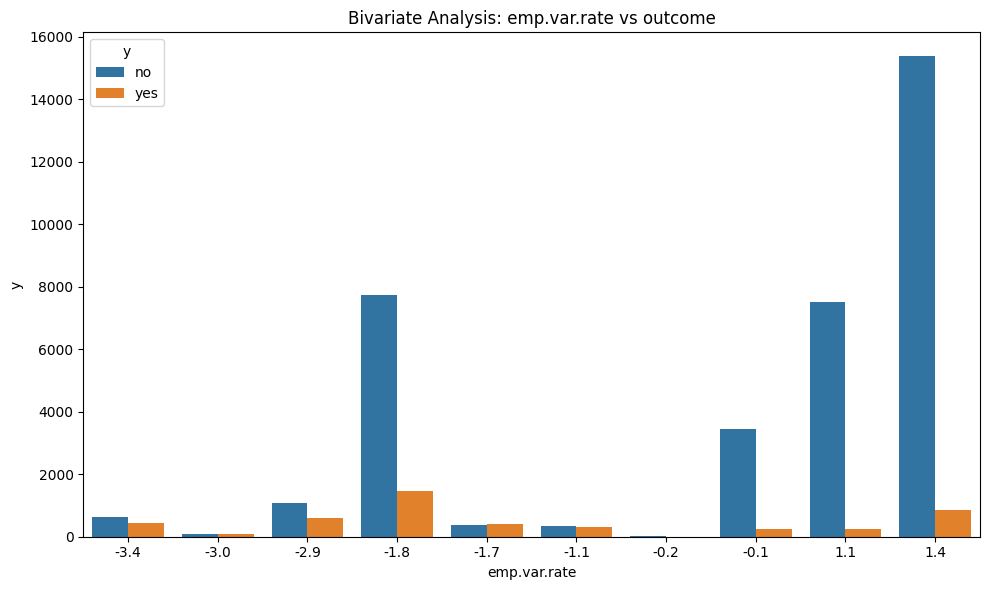

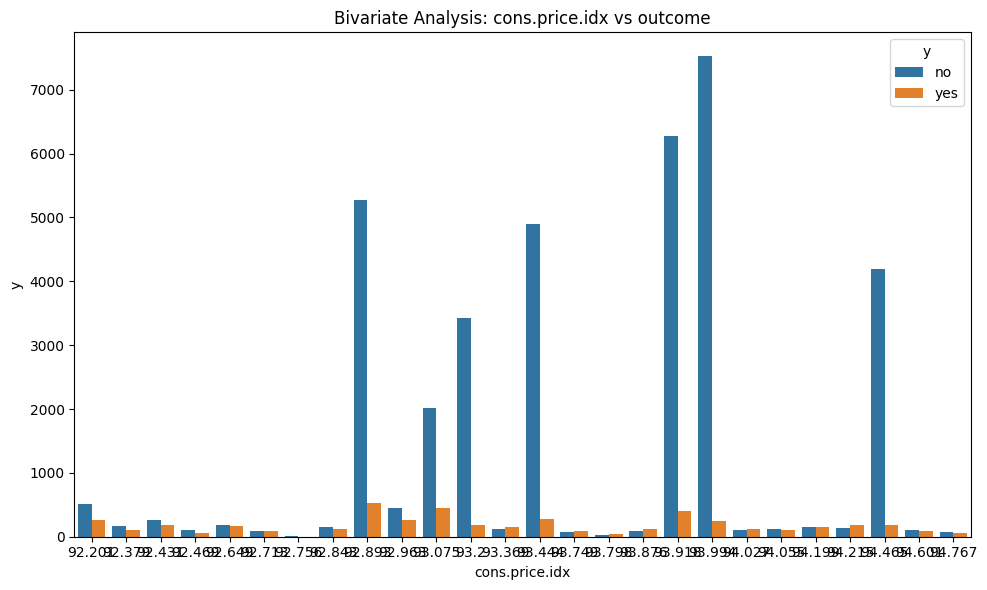

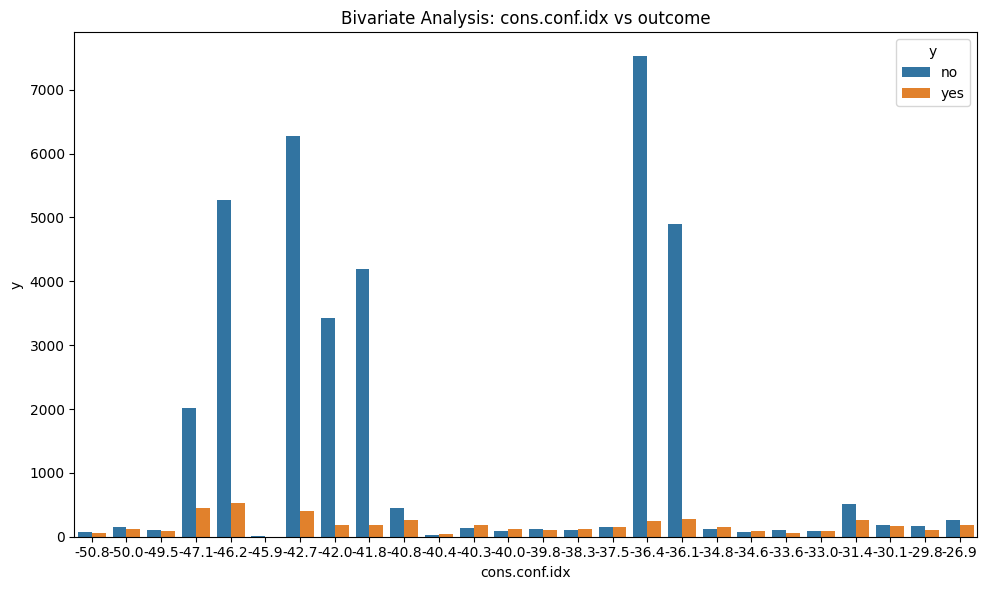

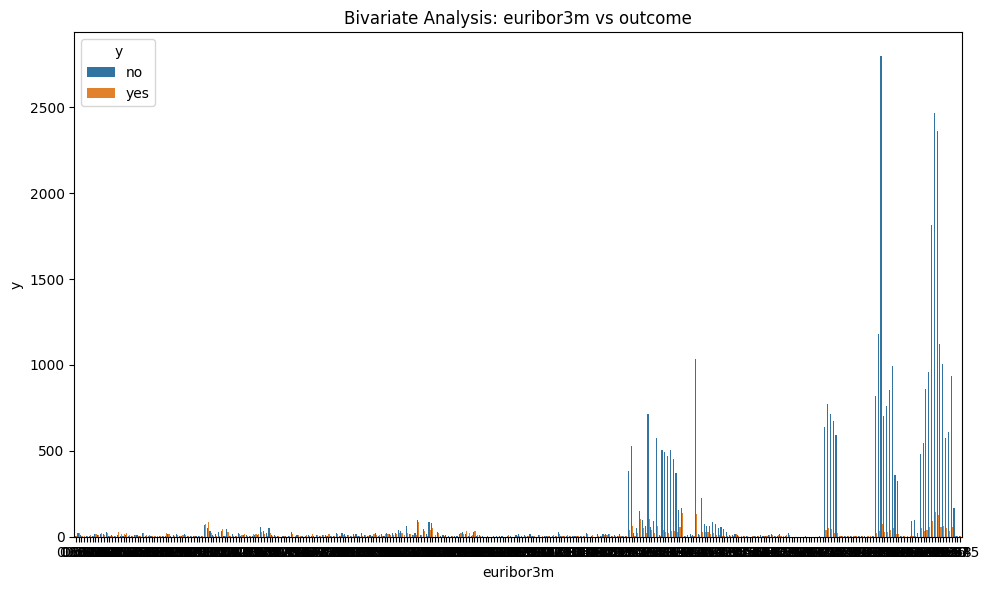

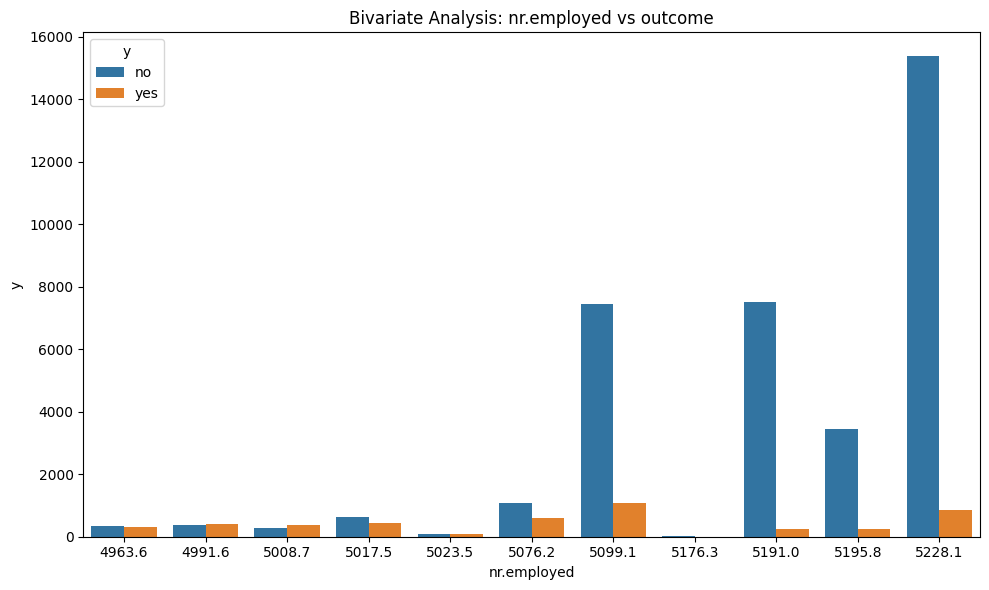

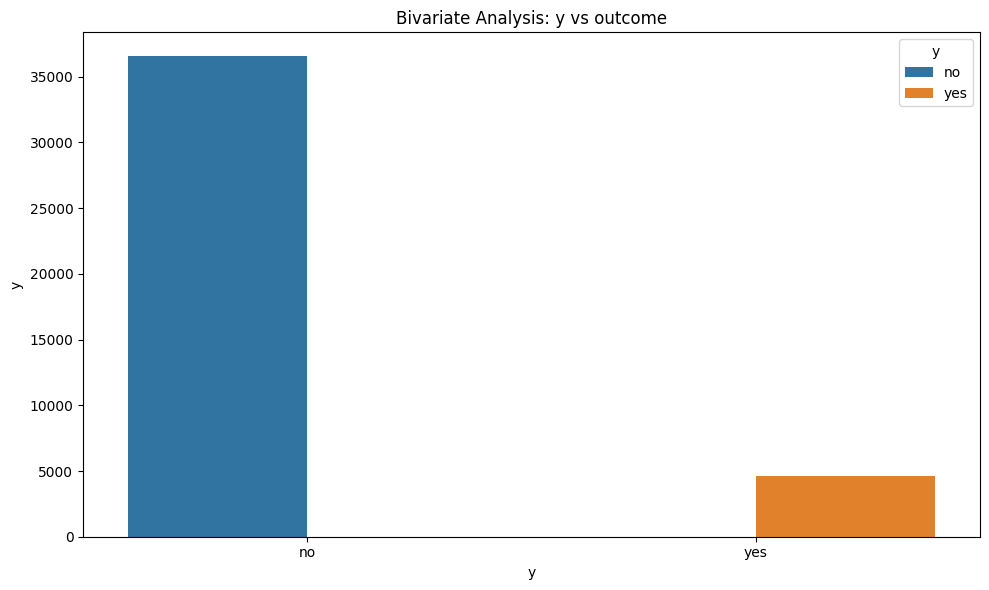

In [199]:
for column in data:
    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data,x=data[column],hue=data.y)
    plt.title(f'Bivariate Analysis: {column} vs outcome')
    plt.xlabel(column)
    plt.ylabel("y")
    plt.tight_layout()
    plt.show()

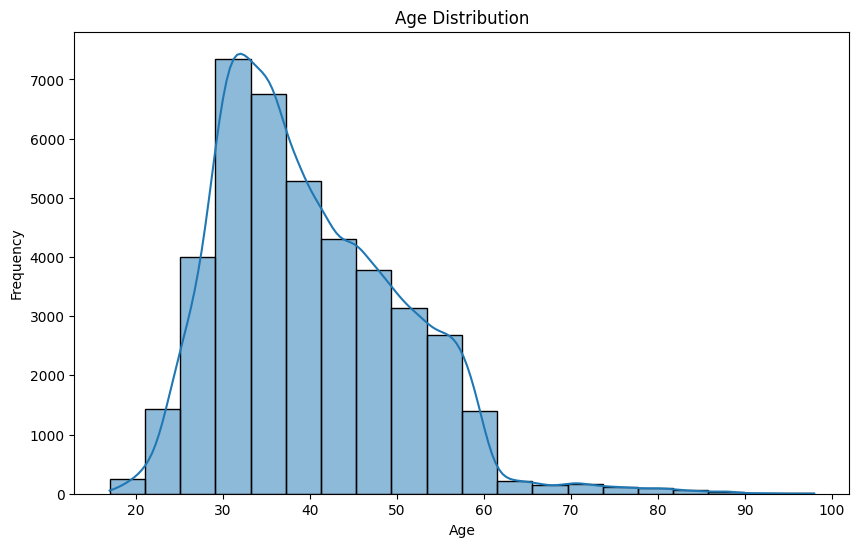

In [200]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## **Insights**

**Age Distribution:**
   - The age distribution of the dataset ranges from 17 to 98 years.
   - The most common age groups are around 30-40 and 50-60 years.
   - There are relatively fewer instances of younger and older individuals.



Text(0.5, 1.0, 'Job Categories')

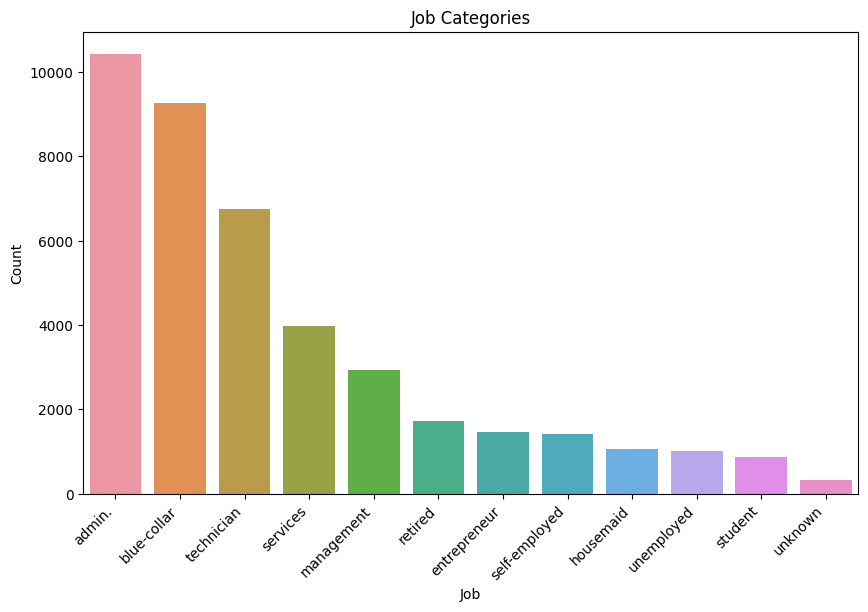

In [201]:
# Job Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='job', order=data['job'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Categories')

# **Insights**

 **Job Categories:**
   - The most common job categories are administrative, blue-collar, and technician roles.
   - The dataset also includes a significant number of individuals in management and services roles.
   - Students and retired individuals are among the least represented job categories.


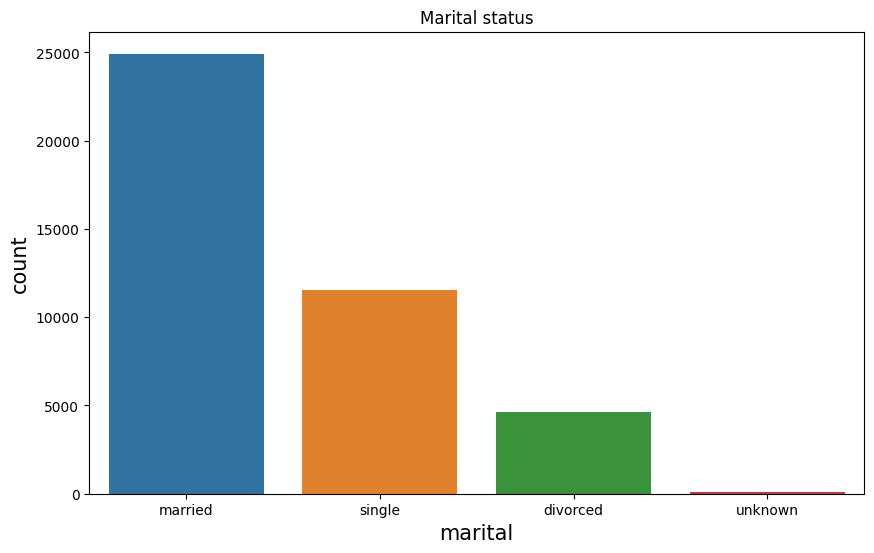

In [202]:
#marital status
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="marital",order=data["marital"].value_counts().index)
plt.xlabel("marital",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Marital status")
plt.show()

## **Insights**

**Marital Status:**
   - The majority of individuals are married, followed by those who are single and divorced.
   - There's a small number of individuals with unknown marital status.


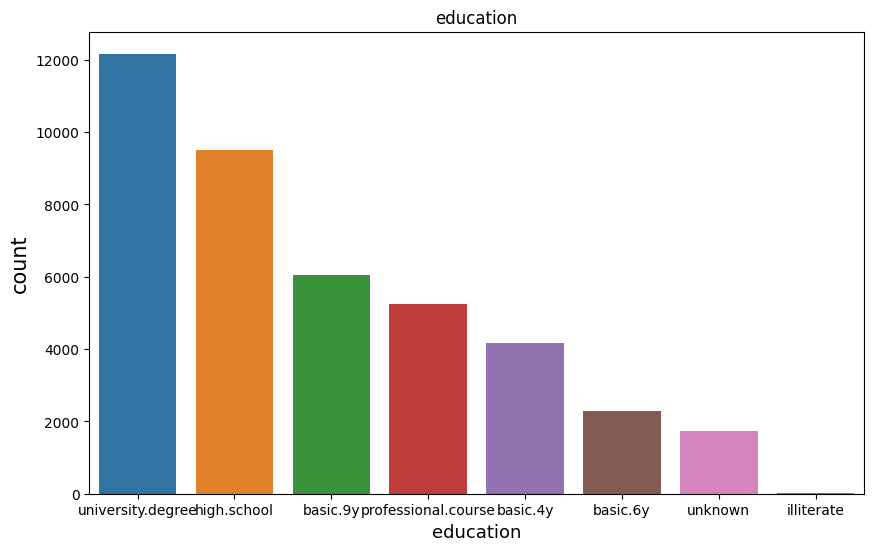

In [203]:
#education
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="education",order=data["education"].value_counts().index)
plt.xlabel("education",fontsize=13)
plt.ylabel("count",fontsize=15)
plt.title("education")
plt.show()

# Insights

**Education Levels:**
   - A substantial portion of individuals have a university degree or high school education.
   - A notable number of individuals have completed basic education levels (e.g., basic.4y, basic.9y).


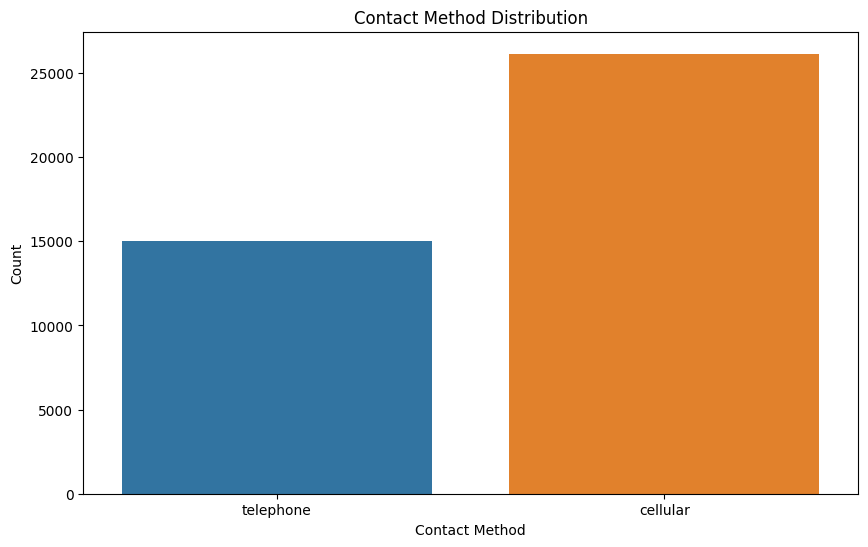

In [204]:
# Contact Method
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='contact')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.title('Contact Method Distribution')
plt.show()

# Insights

 **Contact Method:**
   - The most common contact method is cellular, followed by telephone.



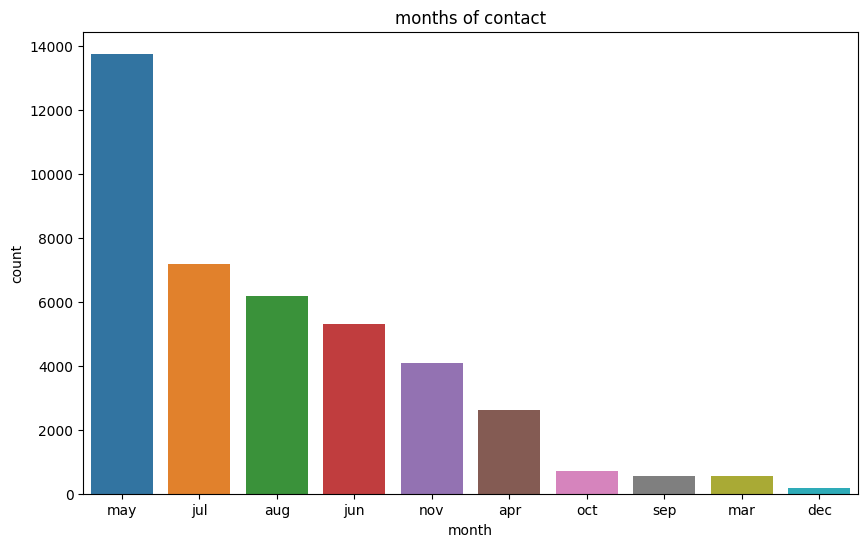

In [205]:
#months
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="month",order=data["month"].value_counts().index)
plt.xlabel("month")
plt.ylabel("count")
plt.title("months of contact")
plt.show()

## **Insights**

**Months of Contact:**
   - May, July, and August are the most frequent months for contact in the dataset.
   - December and March have relatively fewer instances of contact.


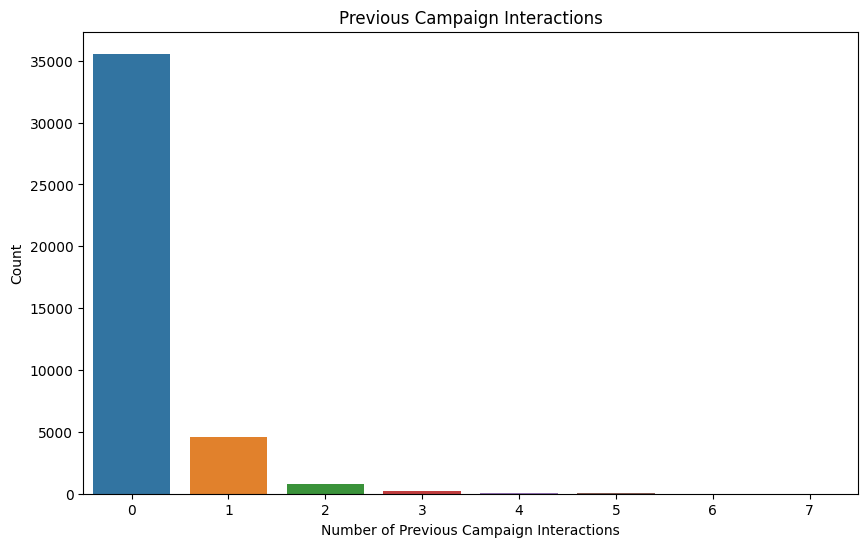

In [206]:
# Previous Campaign Interactions
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='previous')
plt.xlabel('Number of Previous Campaign Interactions')
plt.ylabel('Count')
plt.title('Previous Campaign Interactions')
plt.show()

## **Insights**

 **Previous Campaign Interactions:**
   - The majority of individuals have not been previously contacted in the campaign (previous = 0).
   - A small number of individuals have been contacted multiple times (previous > 1).


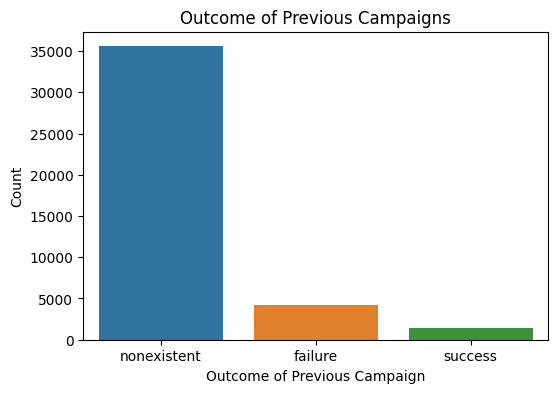

In [207]:
# Outcome of Previous Campaigns
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='poutcome')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('Count')
plt.title('Outcome of Previous Campaigns')
plt.show()

## **Insights**

 **Outcome of Previous Campaigns:**
   - The majority of individuals have a 'nonexistent' outcome from previous campaigns.
   - A smaller portion experienced 'failure' or 'success' outcomes.


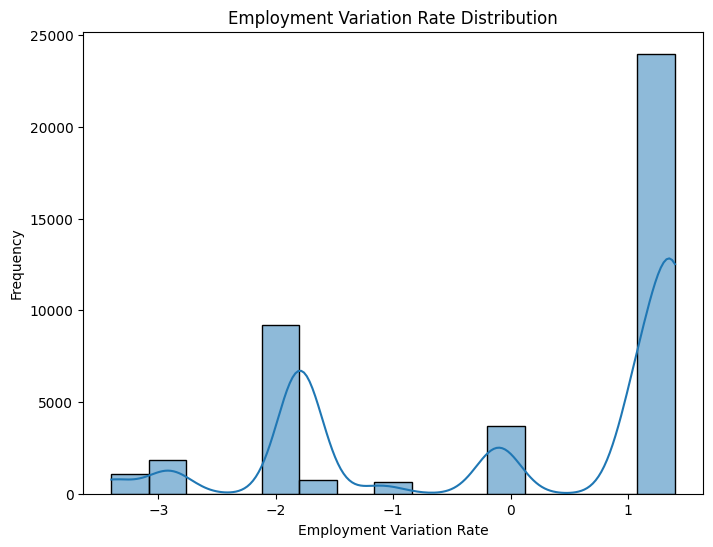

In [208]:
# Employment Variation Rate
plt.figure(figsize=(8, 6))
sns.histplot(data['emp.var.rate'], bins=15, kde=True)
plt.xlabel('Employment Variation Rate')
plt.ylabel('Frequency')
plt.title('Employment Variation Rate Distribution')
plt.show()

## **Insights**

 **Employment Variation Rate:**
   - The employment variation rate varies from positive to negative values.
   - The highest frequency of data points is around positive employment variation rates.


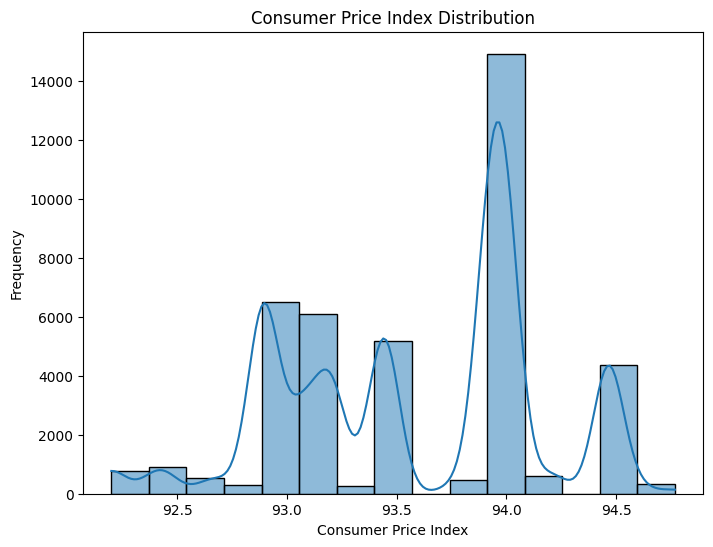

In [209]:
# Consumer Price Index
plt.figure(figsize=(8, 6))
sns.histplot(data['cons.price.idx'], bins=15, kde=True)
plt.xlabel('Consumer Price Index')
plt.ylabel('Frequency')
plt.title('Consumer Price Index Distribution')
plt.show()

## **Insight**

 **Consumer Price Index:**
    - The consumer price index varies across a range of values, with a peak around 93.9.


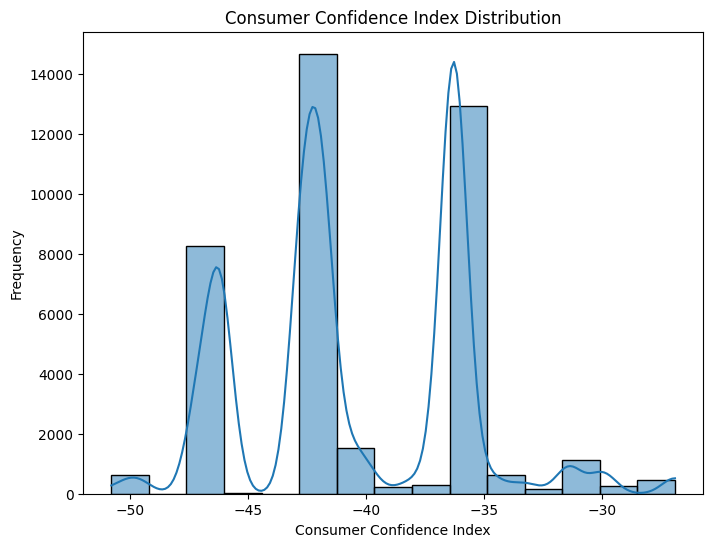

In [210]:
# Consumer Confidence Index
plt.figure(figsize=(8, 6))
sns.histplot(data['cons.conf.idx'], bins=15, kde=True)
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Frequency')
plt.title('Consumer Confidence Index Distribution')
plt.show()

## **Insight**

 **Consumer Confidence Index:**
    - The consumer confidence index ranges from -50 to -25, with a higher concentration around -40.


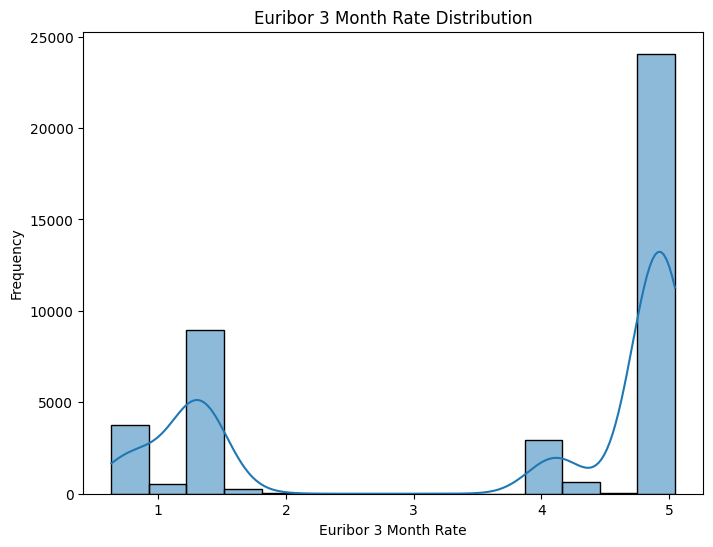

In [211]:
# Euribor 3 Month Rate
plt.figure(figsize=(8, 6))
sns.histplot(data['euribor3m'], bins=15, kde=True)
plt.xlabel('Euribor 3 Month Rate')
plt.ylabel('Frequency')
plt.title('Euribor 3 Month Rate Distribution')
plt.show()

## **Insight**

  **Euribor 3 Month Rate:**
    - The Euribor 3 month rate spans a range of values, with a common value around 4.85.



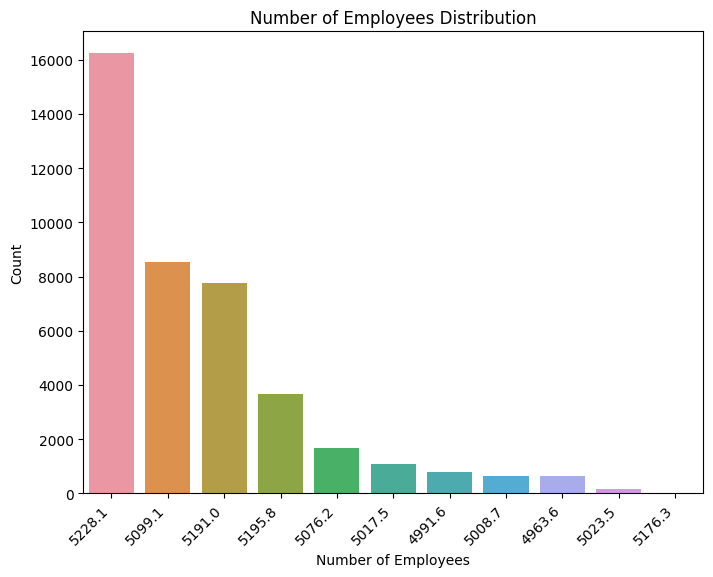

In [212]:
# Number of Employees
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='nr.employed', order=data['nr.employed'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.title('Number of Employees Distribution')
plt.show()

## **Insight**

 **Number of Employees:**
    - The number of employees varies around 5000-5250, with a spike at 5228.1.



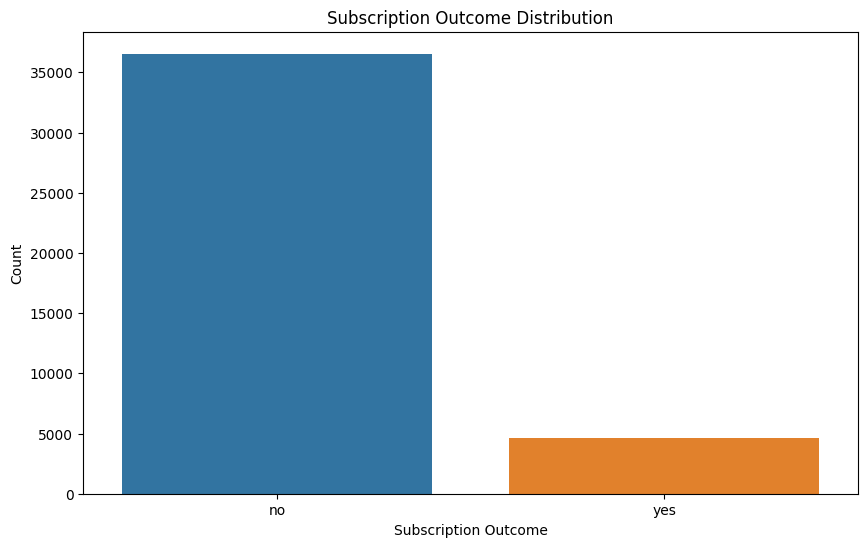

In [213]:
# Subscription Outcome (Target Variable)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='y')
plt.xlabel('Subscription Outcome')
plt.ylabel('Count')
plt.title('Subscription Outcome Distribution')
plt.show()

Insights

 **Subscription Outcome (Target Variable):**
    - The dataset is imbalanced, with a larger number of 'no' (not subscribed) instances compared to 'yes' (subscribed).


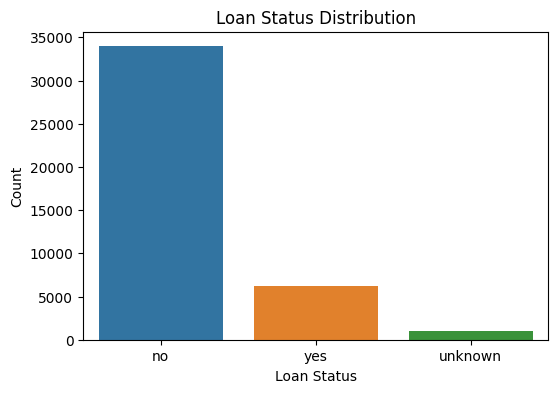

In [214]:
# Loan Status
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')
plt.show()

## Insights

 **Loan Status Influence:**
   - Customers without existing loans and housing tend to show higher interest in the campaign, possibly due to better financial flexibility.
   - The subscription rate is relatively lower among those with existing loans or housing, suggesting financial commitments might affect their decision.


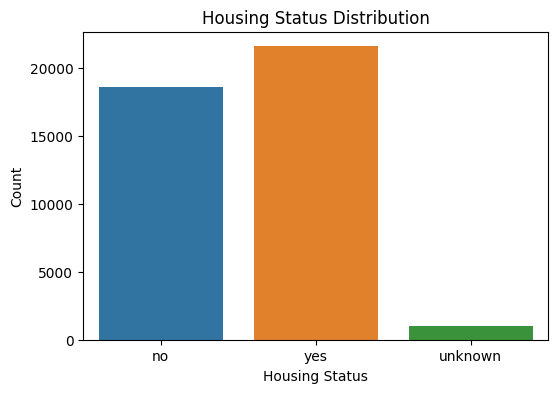

In [215]:
# Housing Status
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='housing')
plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.title('Housing Status Distribution')
plt.show()

# Insights

**Loan and Housing Status Influence:**
   - Customers without existing loans and housing tend to show higher interest in the campaign, possibly due to better financial flexibility.
   - The subscription rate is relatively lower among those with existing loans or housing, suggesting financial commitments might affect their decision.


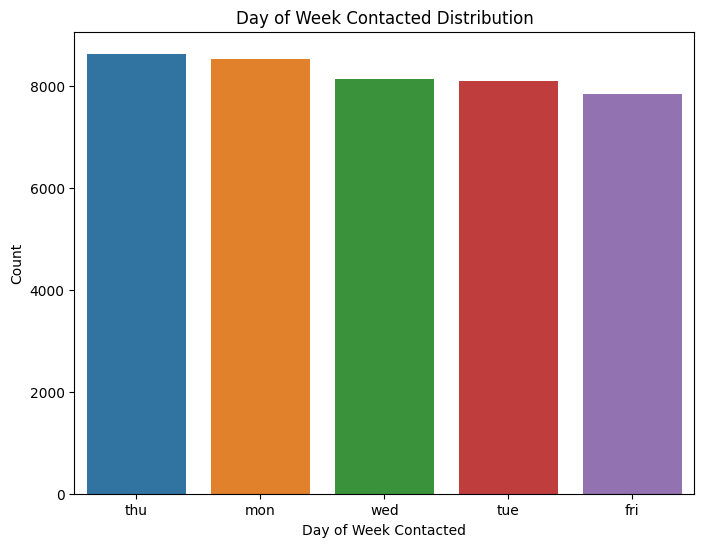

In [216]:
# Day of Week Contacted
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='day_of_week', order=data['day_of_week'].value_counts().index)
plt.xlabel('Day of Week Contacted')
plt.ylabel('Count')
plt.title('Day of Week Contacted Distribution')
plt.show()

## **Insights**

**Day of Week Contact Patterns:**
   - The marketing campaign appears to be most active on Thursdays and Mondays.
   - Fridays experience a slightly lower contact frequency, possibly due to the anticipation of the weekend.


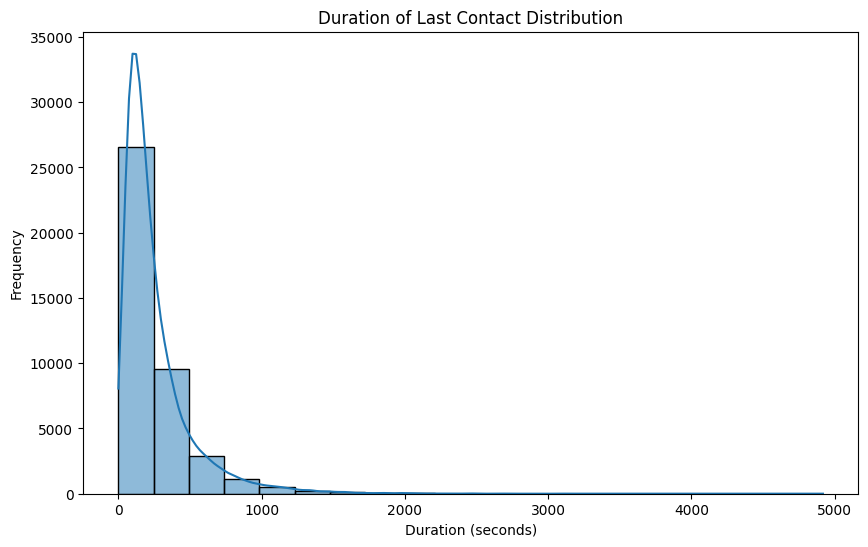

In [217]:
# Duration of Last Contact (Seconds)
plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], bins=20, kde=True)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Duration of Last Contact Distribution')
plt.show()

## **Insights**

 **Duration of Last Contact Impact:**
   - Conversations with longer durations in the last contact tend to result in a higher subscription rate.
   - This insight underscores the importance of engaging and persuasive conversations.


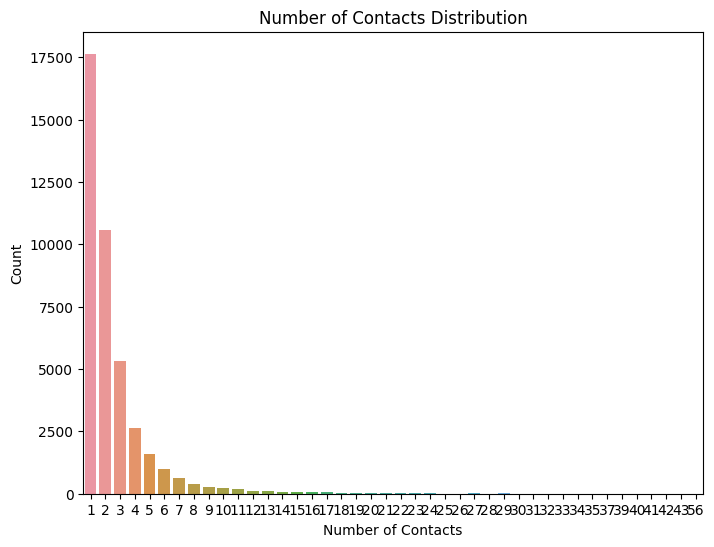

In [218]:
# Number of Contacts in the Current Campaign
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.title('Number of Contacts Distribution')
plt.show()

## **Insights**

 **Number of Contacts in Current Campaign:**
   - As the number of contacts in the current campaign increases, the subscription rate tends to decline.
   - This suggests diminishing returns on contacting the same customer multiple times.


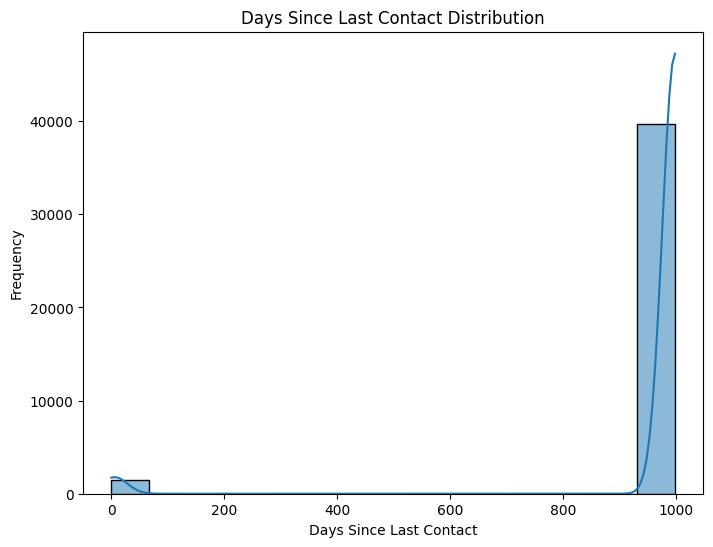

In [219]:
# Number of Days Since Last Contact (pdays)
plt.figure(figsize=(8, 6))
sns.histplot(data['pdays'], bins=15, kde=True)
plt.xlabel('Days Since Last Contact')
plt.ylabel('Frequency')
plt.title('Days Since Last Contact Distribution')
plt.show()

## **Insights**

**Effect of Days Since Last Contact (pdays):**
   - A longer time since the last contact generally leads to a higher subscription rate.
   - This finding suggests that spacing out contacts could lead to more positive outcomes.


## **Multivariate**

In [ ]:
plt.figure(figsize=(40,45))
sns.pairplot(data,hue="y")
plt.tight_layout()

# **Data** **Preprocessing**

## Change Rename columns

In [221]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [222]:
data.rename(columns={"age":"Age","job":"Job","marital":"Marital","education":"Education",
                     "default":"Default","housing":"Housing","loan":"Loan","contact":"Contact",
                     "month":"Month","day_of_week":"Weekday","duration":"Duration","campaign":"Campaign",
                     "pdays":"days_since_last_contact","previous":"Previous_contacts","poutcome":"Previous_outcome",
                     "emp.var.rate":"Employment_variation_rate"," cons.conf.idx":"Consumer_price_index",
                     "cons.conf.idx":"Consumer_confidence_index","euribor3m":"Euribor_3_month","nr.employed":"Num_employees","y":"Subscription"},inplace=True)

In [223]:
data.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan',
       'Contact', 'Month', 'Weekday', 'Duration', 'Campaign',
       'days_since_last_contact', 'Previous_contacts', 'Previous_outcome',
       'Employment_variation_rate', 'cons.price.idx',
       'Consumer_confidence_index', 'Euribor_3_month', 'Num_employees',
       'Subscription'],
      dtype='object')

In [224]:
data.isnull().sum()

Age                          0
Job                          0
Marital                      0
Education                    0
Default                      0
Housing                      0
Loan                         0
Contact                      0
Month                        0
Weekday                      0
Duration                     0
Campaign                     0
days_since_last_contact      0
Previous_contacts            0
Previous_outcome             0
Employment_variation_rate    0
cons.price.idx               0
Consumer_confidence_index    0
Euribor_3_month              0
Num_employees                0
Subscription                 0
dtype: int64

In [225]:
data.duplicated().sum()

12

In [226]:
## Drop dulicated
data = data.drop_duplicates()

In [227]:
data.duplicated().sum()

0

In [228]:
data.dtypes

Age                            int64
Job                           object
Marital                       object
Education                     object
Default                       object
Housing                       object
Loan                          object
Contact                       object
Month                         object
Weekday                       object
Duration                       int64
Campaign                       int64
days_since_last_contact        int64
Previous_contacts              int64
Previous_outcome              object
Employment_variation_rate    float64
cons.price.idx               float64
Consumer_confidence_index    float64
Euribor_3_month              float64
Num_employees                float64
Subscription                  object
dtype: object

# **Check** **Outliers**

In [229]:
## exctract numerical columns from dataset as num_data
num_data=data.select_dtypes(include=["int64","float64"]).columns

In [230]:
num_data

Index(['Age', 'Duration', 'Campaign', 'days_since_last_contact',
       'Previous_contacts', 'Employment_variation_rate', 'cons.price.idx',
       'Consumer_confidence_index', 'Euribor_3_month', 'Num_employees'],
      dtype='object')

In [231]:
cat_data

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

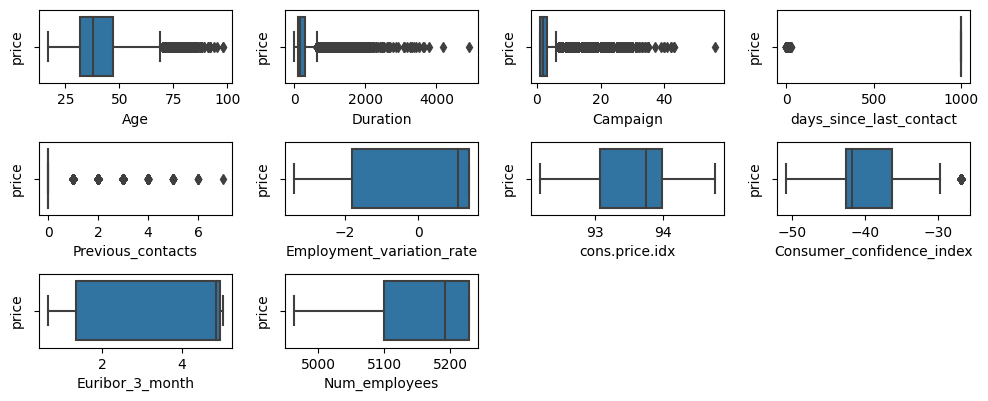

In [232]:
## Box plot for outlier detection
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in num_data:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("price",fontsize=10)
  plotnumber+=1
plt.tight_layout()

####  we have found outliers that why we need to handle them.

## Outliers for AGE

<Axes: xlabel='Age', ylabel='Count'>

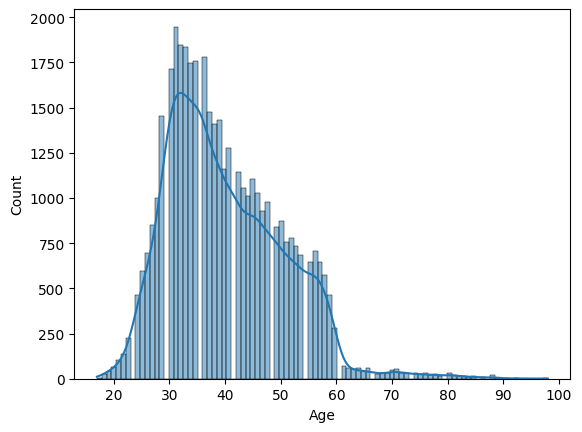

In [233]:
sns.histplot(data=data,x='Age',kde=True)

#### we use IQR methode for handling the outliers because in the above graph we dont have normal distribution.

In [234]:
Q1=data["Age"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Age"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 32.0
upper_quartile 47.0


In [235]:
IQR=Q3-Q1
IQR


15.0

In [236]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 9.5
upper_limit is 69.5


In [237]:
len(data.loc[data["Age"]>upper_limit])/len(data)

0.011365844181076355

In [238]:
data.loc[data["Age"]>upper_limit]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Weekday,Duration,Campaign,days_since_last_contact,Previous_contacts,Previous_outcome,Employment_variation_rate,cons.price.idx,Consumer_confidence_index,Euribor_3_month,Num_employees,Subscription
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,187,3,999,0,nonexistent,-1.8,92.843,-50.0,1.811,5099.1,yes
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,167,9,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,179,1,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,48,1,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,266,2,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,138,4,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,621,1,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,411,1,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [239]:
data.loc[data["Age"]>upper_limit,"Age"]=data["Age"].median()

<Axes: xlabel='Age'>

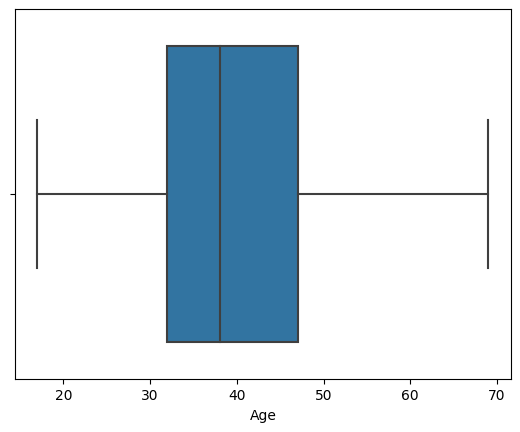

In [240]:
sns.boxplot(x=data.Age)

### Insights
Outliers have been successfully handled and changed in Age column.

## Outliers for Duration

<Axes: xlabel='Duration', ylabel='Count'>

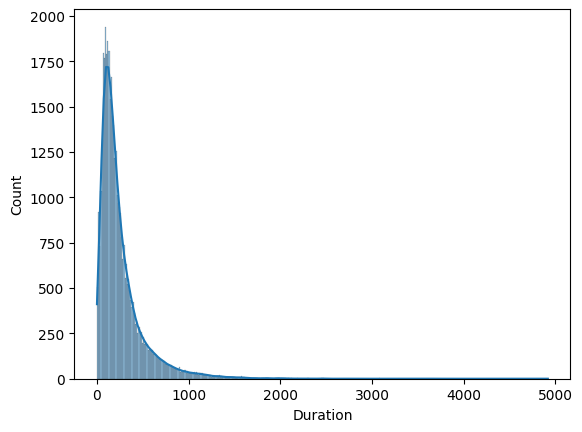

In [241]:
sns.histplot(data=data,x='Duration',kde=True)

In [242]:
Q1=data["Duration"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Duration"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 102.0
upper_quartile 319.0


In [243]:
IQR=Q3-Q1
IQR

217.0

In [244]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -223.5
upper_limit is 644.5


In [245]:
data.loc[data["Duration"]>upper_limit]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Weekday,Duration,Campaign,days_since_last_contact,Previous_contacts,Previous_outcome,Employment_variation_rate,cons.price.idx,Consumer_confidence_index,Euribor_3_month,Num_employees,Subscription
37,52,technician,married,basic.9y,no,yes,no,telephone,may,mon,1666,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57,45,services,married,high.school,unknown,yes,no,telephone,may,mon,787,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
61,51,blue-collar,married,basic.9y,no,yes,no,telephone,may,mon,812,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,25,technician,single,professional.course,no,yes,no,cellular,nov,fri,712,2,19,1,success,-1.1,94.767,-50.8,1.040,4963.6,yes
41153,67,housemaid,divorced,professional.course,no,yes,no,cellular,nov,mon,655,2,5,5,success,-1.1,94.767,-50.8,1.039,4963.6,yes
41160,33,admin.,married,university.degree,no,no,no,cellular,nov,tue,843,1,999,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,1868,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes


In [246]:
len(data.loc[data["Duration"]>upper_limit])/len(data)

0.07195939382164368

In [247]:
data.loc[data["Duration"]>upper_limit,"Duration"]=data["Duration"].median()

<Axes: xlabel='Duration'>

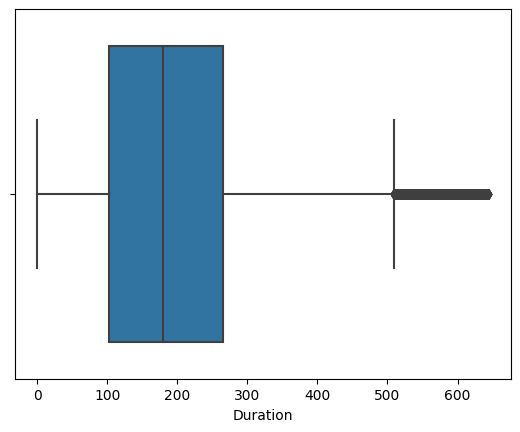

In [248]:
sns.boxplot(x=data.Duration)

## Outliers for Campaign

<Axes: xlabel='Campaign', ylabel='Count'>

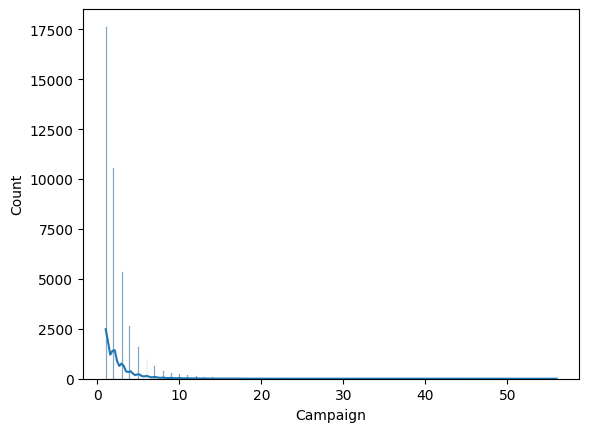

In [249]:
sns.histplot(data=data,x='Campaign',kde=True)

In [250]:
Q1=data["Campaign"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Campaign"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 1.0
upper_quartile 3.0


In [251]:
IQR=Q3-Q1
IQR

2.0

In [252]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -2.0
upper_limit is 6.0


In [253]:
data.loc[data["Campaign"]>upper_limit]

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Weekday,Duration,Campaign,days_since_last_contact,Previous_contacts,Previous_outcome,Employment_variation_rate,cons.price.idx,Consumer_confidence_index,Euribor_3_month,Num_employees,Subscription
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,388,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1043,41,technician,single,university.degree,unknown,no,no,telephone,may,wed,79,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,253,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1097,51,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,244,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,521,7,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,38,retired,married,basic.9y,no,no,no,telephone,sep,fri,543,9,999,1,failure,-1.1,94.199,-37.5,0.883,4963.6,no
40631,38,retired,married,basic.4y,no,yes,no,cellular,sep,mon,213,7,999,0,nonexistent,-1.1,94.199,-37.5,0.882,4963.6,no
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,157,7,3,5,success,-1.1,94.199,-37.5,0.879,4963.6,no
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,246,9,999,2,failure,-1.1,94.199,-37.5,0.879,4963.6,no


In [254]:
len(data.loc[data["Campaign"]>upper_limit])/len(data)

0.05843209636681562

In [255]:
data.loc[data["Campaign"]>upper_limit,"Campaign"]=data["Campaign"].median()

<Axes: xlabel='Campaign'>

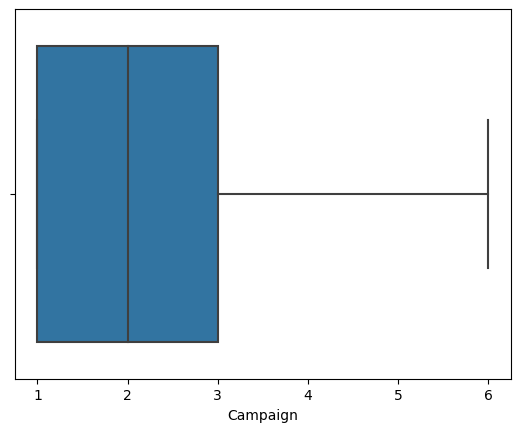

In [256]:
sns.boxplot(x=data.Campaign)

## Outliers for days_since_last_contact

<Axes: xlabel='days_since_last_contact', ylabel='Count'>

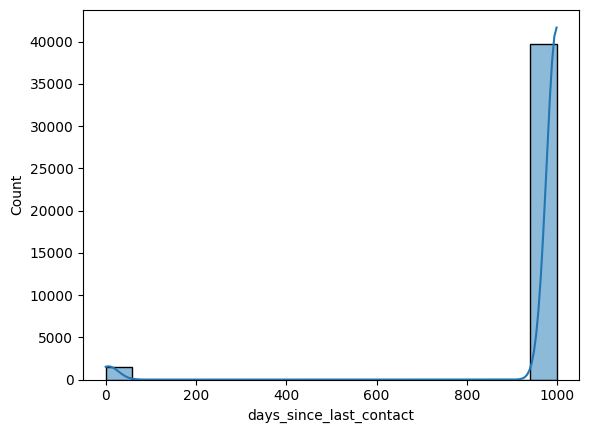

In [257]:
sns.histplot(data=data,x='days_since_last_contact',kde=True)

In [258]:
Q1=data["days_since_last_contact"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["days_since_last_contact"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 999.0
upper_quartile 999.0


In [259]:
IQR=Q3-Q1
IQR

0.0


In such a situation, using the IQR method to identify outliers wouldn't provide meaningful results. It's possible that there might be an issue with the data or the calculations leading to this scenario, and it's worth investigating further to ensure the accuracy of your calculations and the validity of the data itself.

## outliers for Previous_contacts

<Axes: xlabel='Previous_contacts', ylabel='Count'>

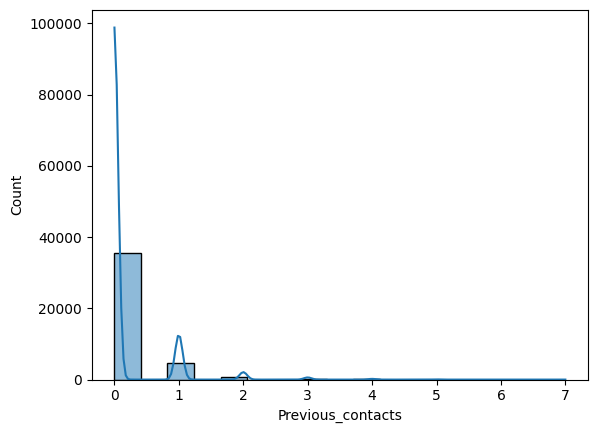

In [260]:
sns.histplot(data=data,x='Previous_contacts',kde=True)

In [261]:
Q1=data["Previous_contacts"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Previous_contacts"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 0.0


In [262]:
IQR=Q3-Q1
IQR

0.0

In such a situation, using the IQR method to identify outliers wouldn't provide meaningful results. It's possible that there might be an issue with the data or the calculations leading to this scenario, and it's worth investigating further to ensure the accuracy of your calculations and the validity of the data itself

## Outliers for Consumer_confidence_index

<Axes: xlabel='Consumer_confidence_index', ylabel='Count'>

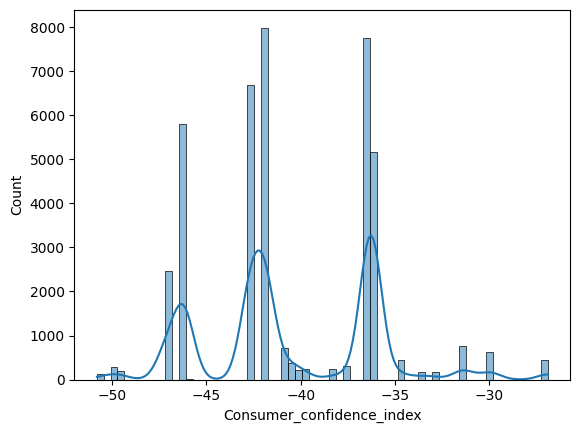

In [263]:
sns.histplot(data=data,x='Consumer_confidence_index',kde=True)

In [264]:
Q1=data["Consumer_confidence_index"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["Consumer_confidence_index"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile -42.7
upper_quartile -36.4


In [265]:
IQR=Q3-Q1
IQR

6.300000000000004

In [266]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -52.150000000000006
upper_limit is -26.949999999999992


In [267]:
data.loc[data["Consumer_confidence_index"]>upper_limit,"Consumer_confidence_index"]=data["Consumer_confidence_index"].median()

<Axes: xlabel='Consumer_confidence_index'>

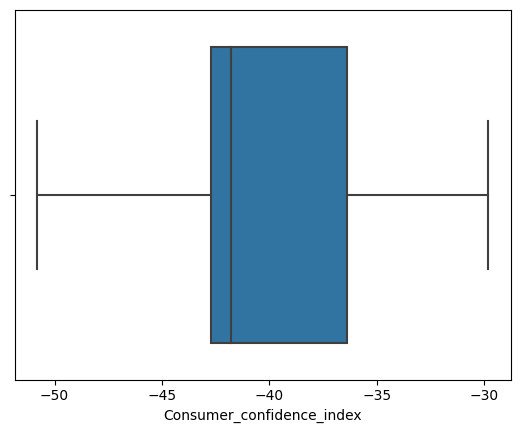

In [268]:
sns.boxplot(x=data.Consumer_confidence_index)

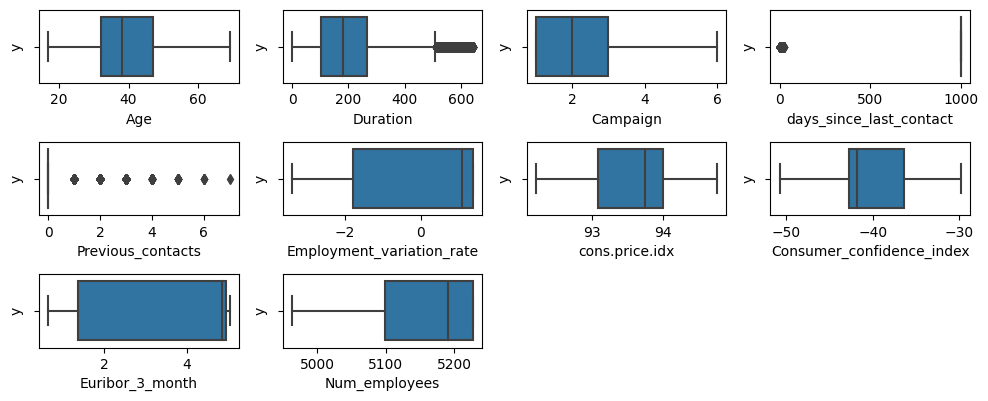

In [269]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1

for column in num_data:
  if plotnumber<17:
    ax=plt.subplot(4,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("y",fontsize=10)
  plotnumber+=1
plt.tight_layout()

#**Feature Engineering**

#**Feature Encoding**

In [270]:
# Converting of Categorical Datas into Numerical Datas by Encoding Techniques

#**JOB**
<!--  -->

In [271]:
data.Job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

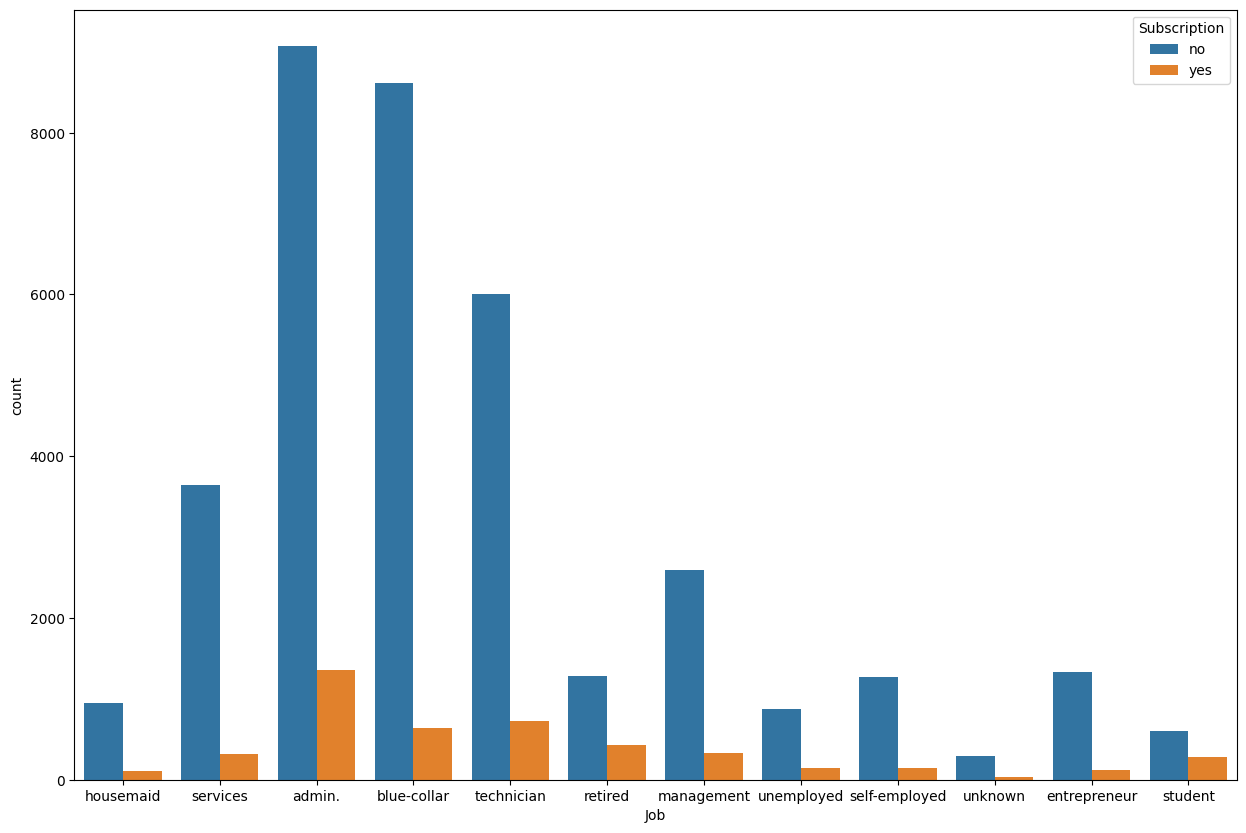

In [272]:
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Job",hue="Subscription")
plt.xlabel("Job")
plt.show()

In [273]:
# Applying Manual encoder
data.Job=data.Job.map({"unknown":0,"housemaid":1,"entrepreneur":2,"unemployed":3,"self-employed":4,"student":5,"services":6,"management":7,"retired":8,"blue-collar":9,"technician":10,"admin.":11})

#**Marital**

In [274]:
data.Marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

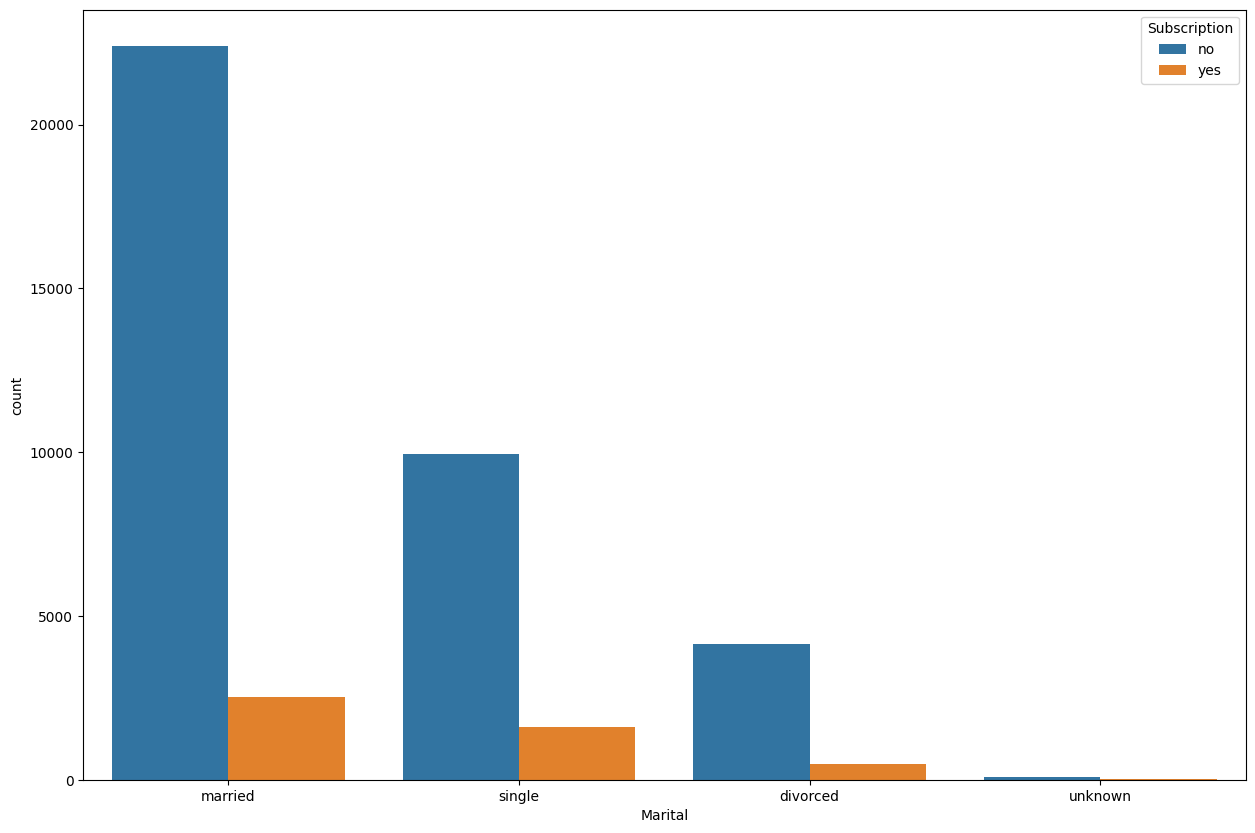

In [275]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Marital",hue="Subscription")
plt.xlabel("Marital")
plt.show()

In [276]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data.Marital=label.fit_transform(data.Marital)

#**Education**

In [277]:
data.Education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

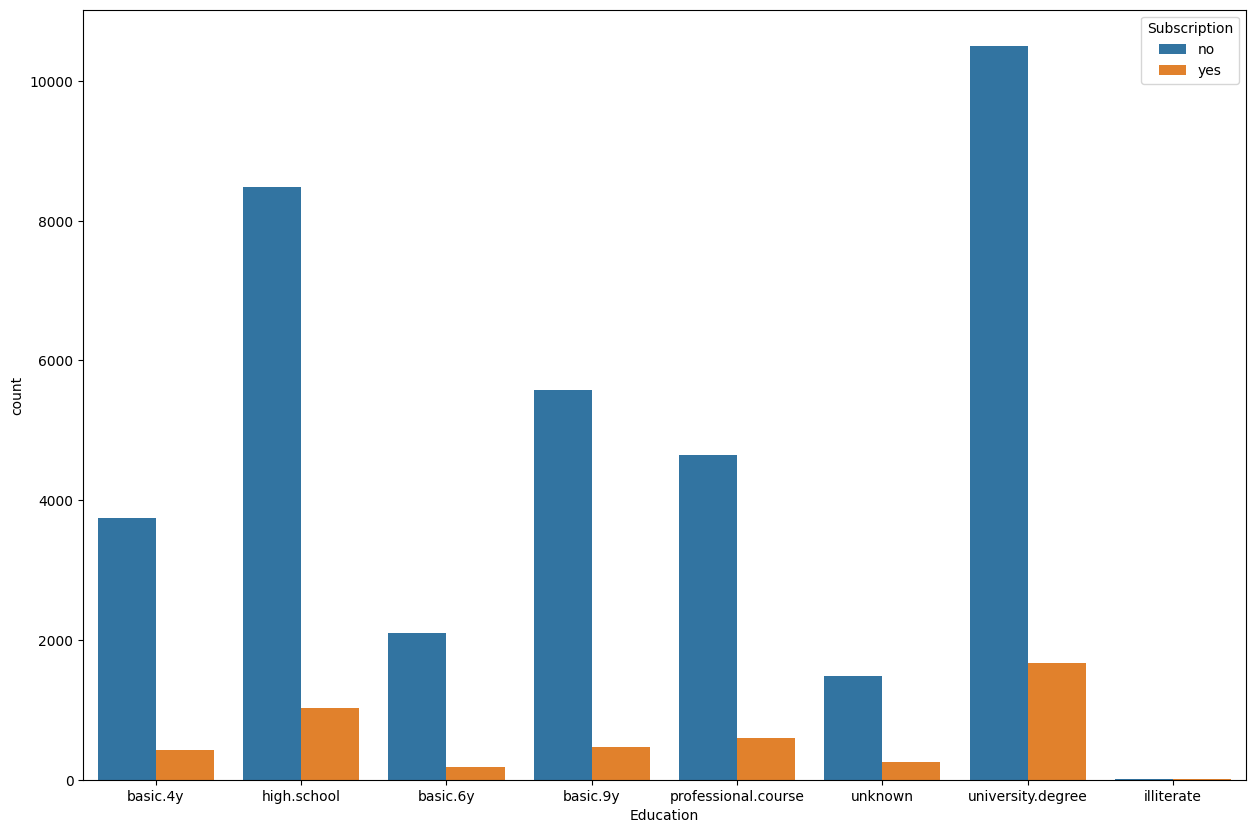

In [278]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Education",hue="Subscription")
plt.xlabel("Education")
plt.show()

In [279]:
# Applying Manual encoder (There are multiple Categories)
data.Education=data.Education.map({"illiterate":0,"basic.6y":1,"unknown":2,"basic.4y":3,"basic.9y":4,"professional.course":5,"high.school":6,"university.degree":7})

#**Default**

In [280]:
data.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan',
       'Contact', 'Month', 'Weekday', 'Duration', 'Campaign',
       'days_since_last_contact', 'Previous_contacts', 'Previous_outcome',
       'Employment_variation_rate', 'cons.price.idx',
       'Consumer_confidence_index', 'Euribor_3_month', 'Num_employees',
       'Subscription'],
      dtype='object')

In [281]:
data.Default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

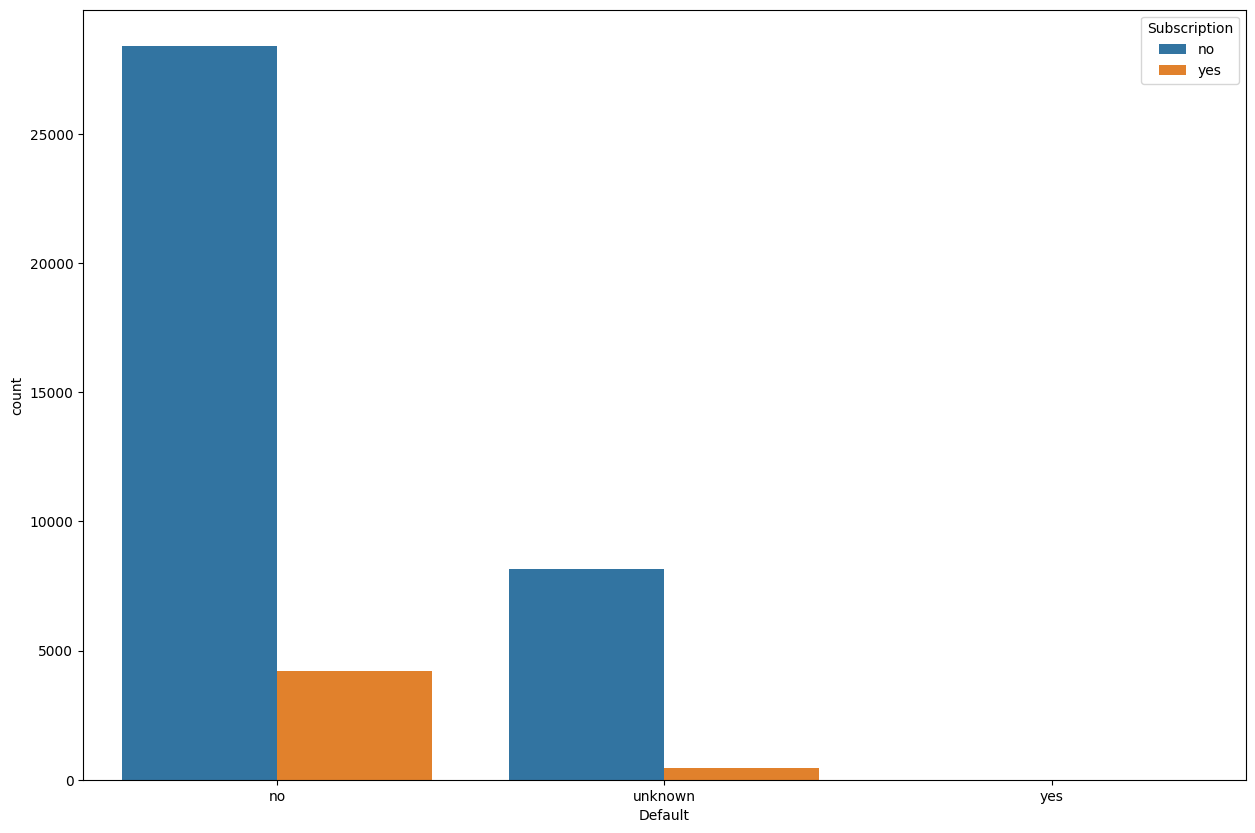

In [282]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Default",hue="Subscription")
plt.xlabel("Default")
plt.show()

In [283]:
# Applying Label encoder
label=LabelEncoder()
data.Default=label.fit_transform(data.Default)

#**Housing**

In [284]:
data.Housing.unique()

array(['no', 'yes', 'unknown'], dtype=object)

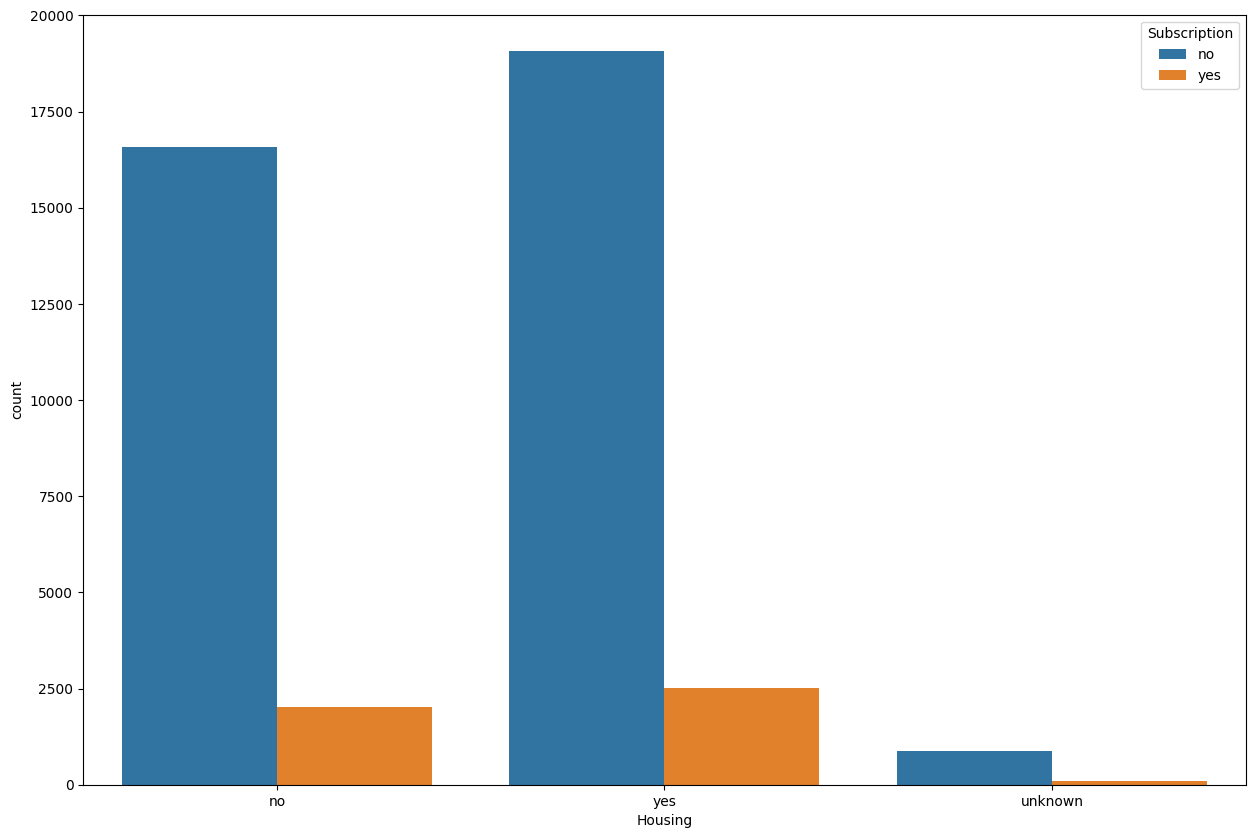

In [285]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Housing",hue="Subscription")
plt.xlabel("Housing")
plt.show()

In [286]:
# Applying Label encoder
label=LabelEncoder()
data.Housing=label.fit_transform(data.Housing)

#**Loan**

In [287]:
data.Loan.unique()

array(['no', 'yes', 'unknown'], dtype=object)

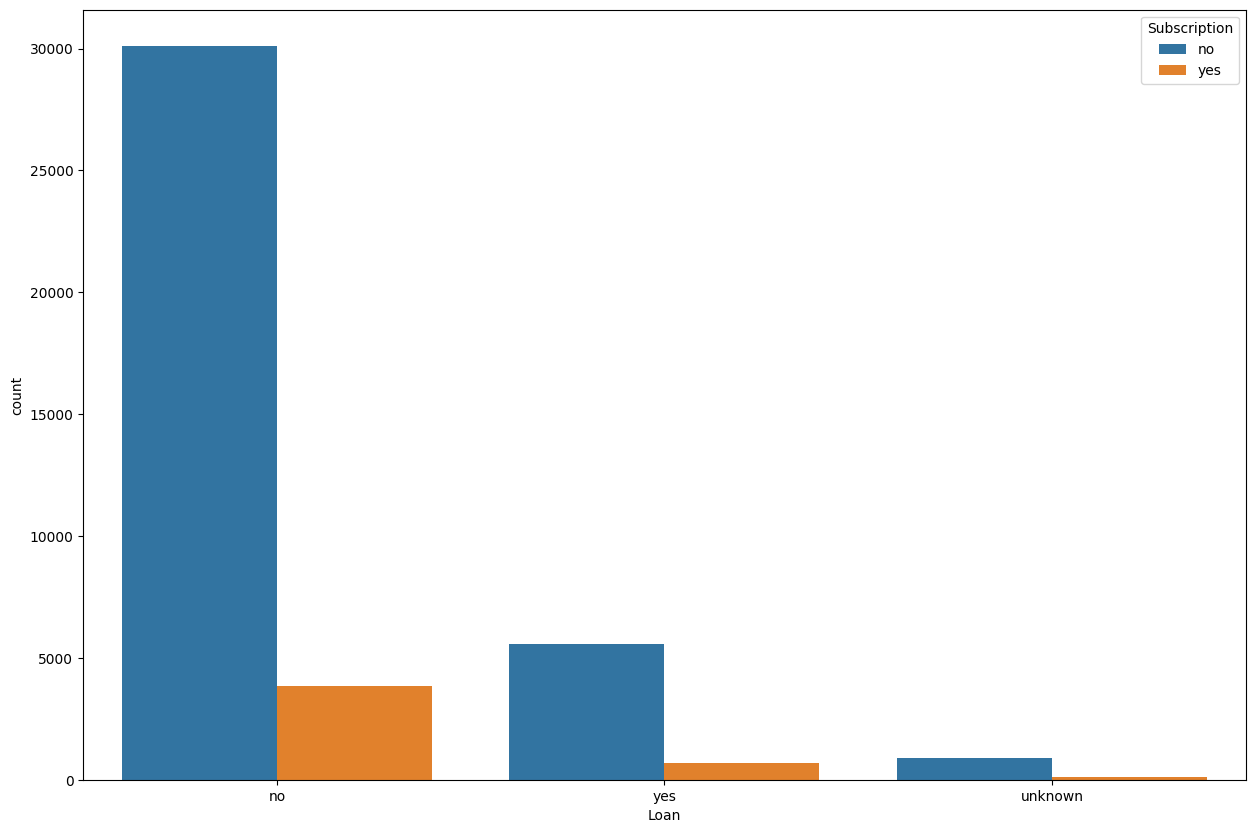

In [288]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Loan",hue="Subscription")
plt.xlabel("Loan")
plt.show()

In [289]:
# Applying Label encoder
label=LabelEncoder()
data.Loan=label.fit_transform(data.Loan)

#**Contact**

In [290]:
data.Contact.unique()

array(['telephone', 'cellular'], dtype=object)

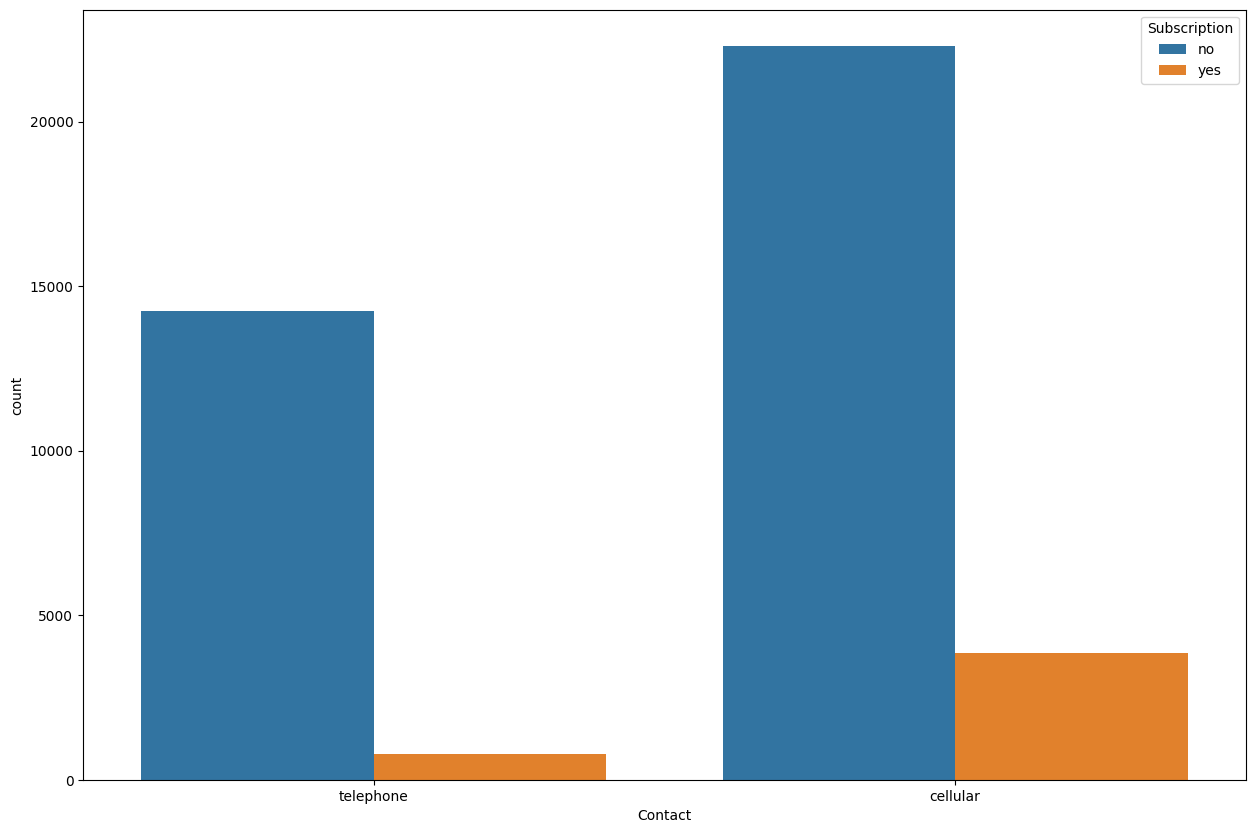

In [291]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Contact",hue="Subscription")
plt.xlabel("Contact")
plt.show()

In [292]:
# Apply OneHot Encoder
data.Contact=pd.get_dummies(data.Contact,drop_first=True)

#**Month**

In [293]:
data.Month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

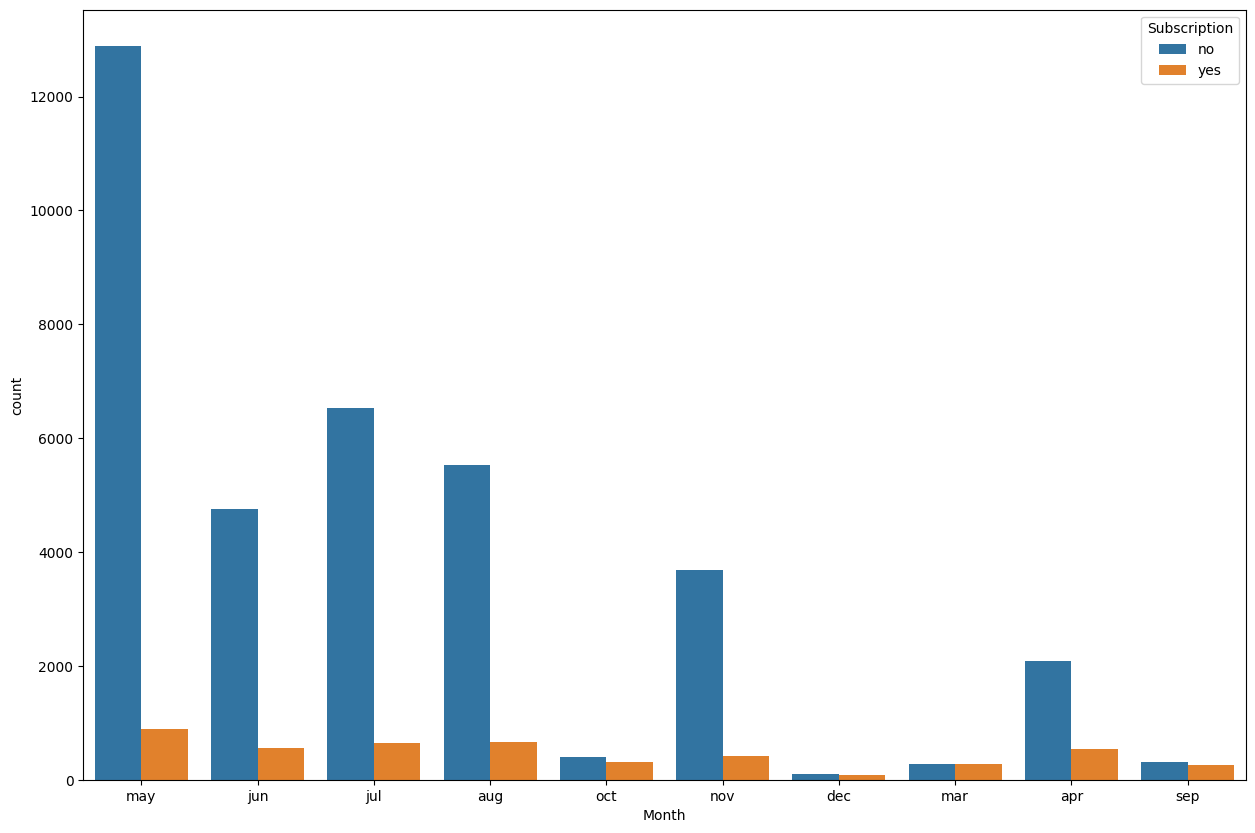

In [294]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Month",hue="Subscription")
plt.xlabel("Month")
plt.show()

In [295]:
# Applying ManualEncoder
data.Month=data.Month.map({"dec":0,"sep":1,"mar":2,"oct":3,"nov":4,"jun":5,"apr":6,"jul":7,"aug":8,"may":9})

#**Weekday**

In [296]:
data.Weekday.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

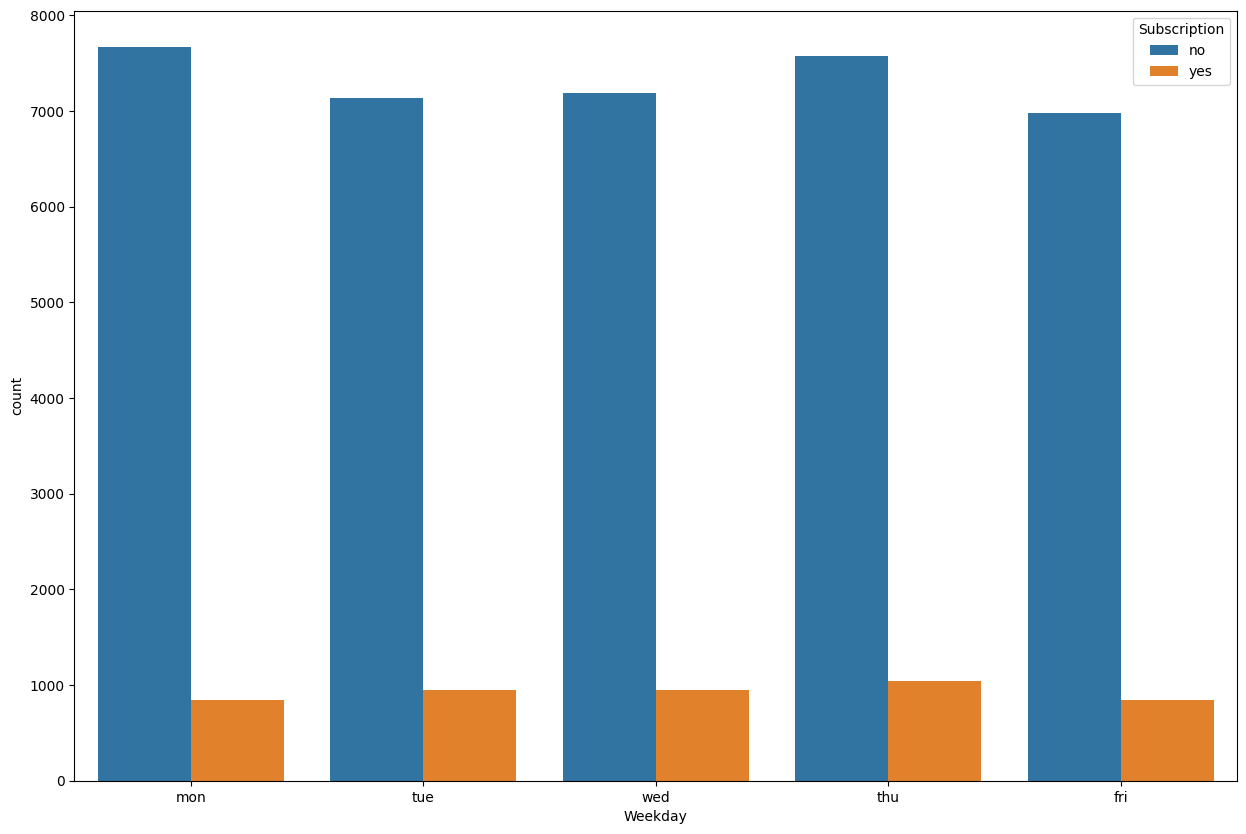

In [297]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Weekday",hue="Subscription")
plt.xlabel("Weekday")
plt.show()

In [298]:
# Apply Manual encoder
data.Weekday=data.Weekday.map({"mon":0,"fri":1,"tue":2,"wed":3,"thu":4})

#**Previous_outcome**

In [299]:
data.Previous_outcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

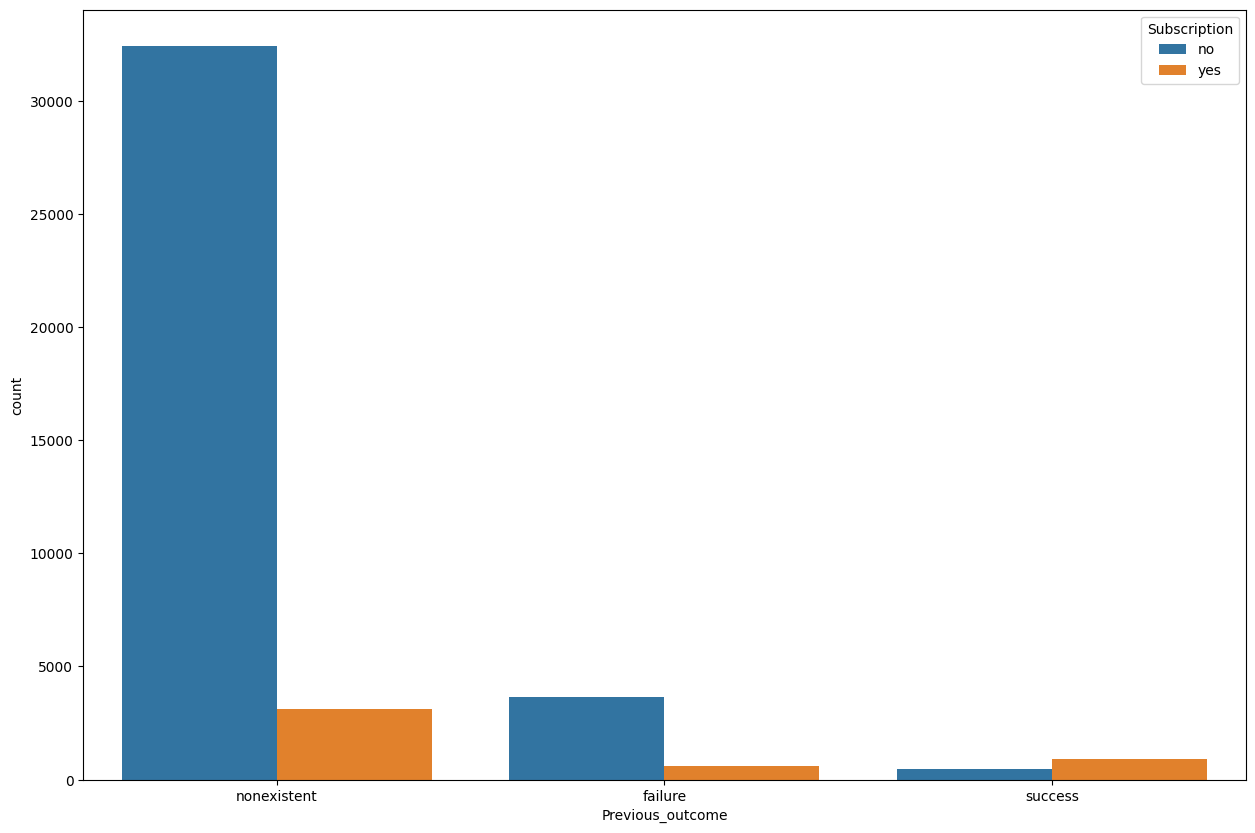

In [300]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Previous_outcome",hue="Subscription")
plt.xlabel("Previous_outcome")
plt.show()

In [301]:
# Applying Label encoder
label=LabelEncoder()
data.Previous_outcome=label.fit_transform(data.Previous_outcome)

#**Subscription**

In [302]:
data.Subscription.unique()

array(['no', 'yes'], dtype=object)

In [303]:
# Applying Label encoder
label=LabelEncoder()
data.Subscription=label.fit_transform(data.Subscription)

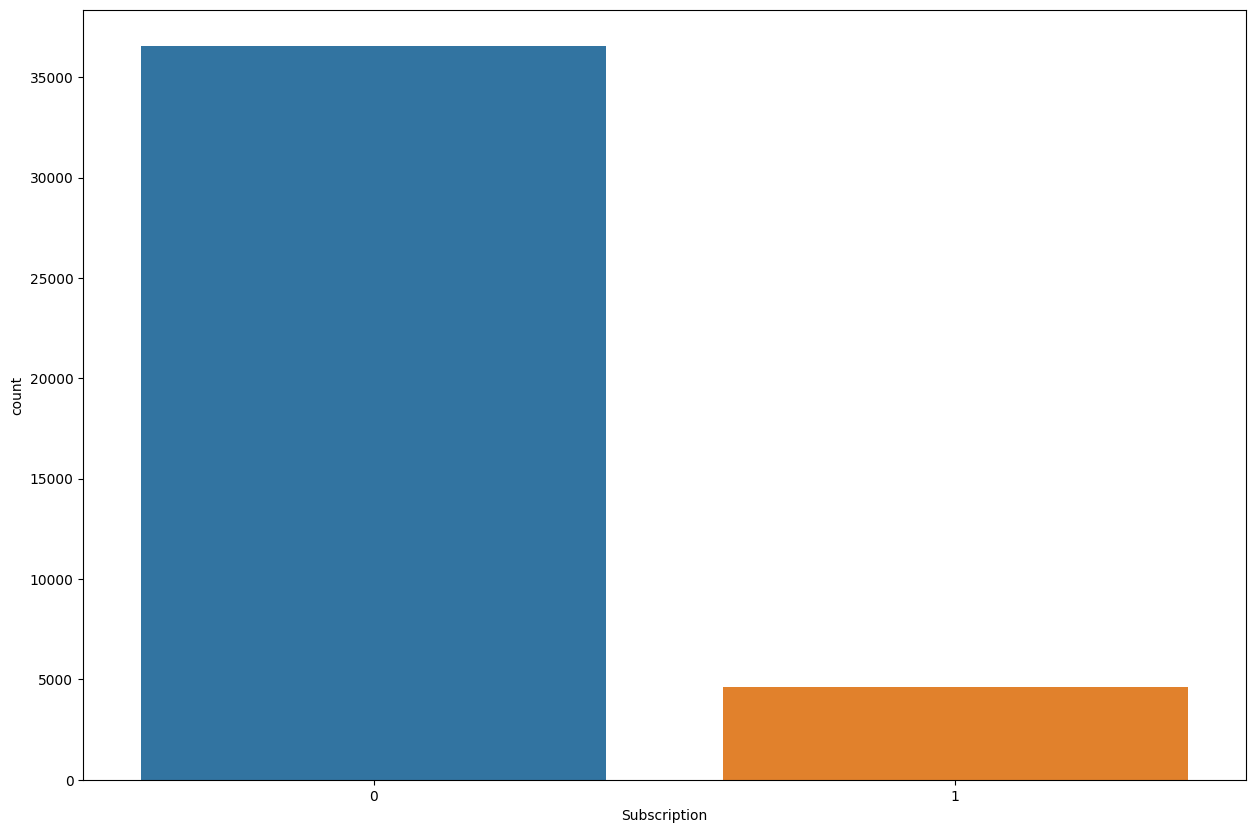

In [304]:
# countplot
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Subscription")
plt.xlabel("Subscription")
plt.show()

#**Saving the Preprocessed Data**

In [305]:
data.to_csv('preprocessed_data.csv', index=False)

In [306]:
preprocessed_data=pd.read_csv("preprocessed_data.csv")
preprocessed_data

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Weekday,Duration,Campaign,days_since_last_contact,Previous_contacts,Previous_outcome,Employment_variation_rate,cons.price.idx,Consumer_confidence_index,Euribor_3_month,Num_employees,Subscription
0,56,1,1,3,0,0,0,1,9,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,6,1,6,1,0,0,1,9,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,6,1,6,0,2,0,1,9,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,11,1,1,0,0,0,1,9,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,6,1,6,0,0,2,1,9,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,38,8,1,5,0,2,0,0,4,1,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,9,1,5,0,0,0,0,4,1,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,8,1,7,0,2,0,0,4,1,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,10,1,5,0,0,0,0,4,1,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


#**Correlation**

In [307]:
preprocessed_data.corr()

,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Weekday,Duration,Campaign,days_since_last_contact,Previous_contacts,Previous_outcome,Employment_variation_rate,cons.price.idx,Consumer_confidence_index,Euribor_3_month,Num_employees,Subscription
Age,1.000000,-0.080844,-0.388142,-0.144452,0.190914,-0.003958,-0.007726,0.032989,-0.027298,-0.035371,0.003752,0.010061,0.006086,-0.021825,0.016569,0.070892,0.036791,0.101042,0.083740,0.067970,-0.020295
Job,-0.080844,1.000000,0.057233,0.127040,-0.073316,0.003895,0.008987,-0.046741,0.038797,0.001147,-0.005827,0.012124,0.006082,-0.006846,-0.000926,0.013285,-0.024564,0.012067,0.004948,0.014579,0.000539
Marital,-0.388142,0.057233,1.000000,0.112377,-0.079432,0.010499,0.005806,-0.054527,-0.007702,0.017270,0.003492,-0.010207,-0.037955,0.038708,0.001905,-0.084142,-0.057431,-0.039707,-0.091881,-0.086134,0.046249
Education,-0.144452,0.127040,0.112377,1.000000,-0.220672,0.016172,0.011460,-0.106481,-0.062643,-0.008474,-0.018884,-0.004152,-0.031071,0.030937,0.003482,-0.051064,-0.092732,0.040125,-0.042855,-0.037578,0.040680
Default,0.190914,-0.073316,-0.079432,-0.220672,1.000000,-0.015790,-0.003823,0.135275,0.110147,-0.010449,-0.015366,0.026525,0.080086,-0.102458,0.023437,0.203257,0.168076,0.044036,0.195335,0.189846,-0.099364
Housing,-0.003958,0.003895,0.010499,0.016172,-0.015790,1.000000,0.044272,-0.082098,-0.013867,0.004830,-0.009830,-0.007864,-0.010539,0.021293,-0.011771,-0.060248,-0.080579,-0.035700,-0.059283,-0.045892,0.011613
Loan,-0.007726,0.008987,0.005806,0.011460,-0.003823,0.044272,1.000000,-0.008589,0.006805,-0.007317,-0.013250,0.013370,0.000371,-0.001374,-0.001486,0.001840,-0.002474,-0.009649,0.000125,0.003910,-0.004922
Contact,0.032989,-0.046741,-0.054527,-0.106481,0.135275,-0.082098,-0.008589,1.000000,0.132064,-0.021690,-0.029749,0.043604,0.117999,-0.212903,0.118773,0.393730,0.591596,0.282537,0.399892,0.269285,-0.144774
Month,-0.027298,0.038797,-0.007702,-0.062643,0.110147,-0.013867,0.006805,0.132064,1.000000,0.004612,0.006256,0.060056,0.158798,-0.155190,-0.018755,0.192561,0.001928,0.127189,0.133942,0.167410,-0.186796
Weekday,-0.035371,0.001147,0.017270,-0.008474,-0.010449,0.004830,-0.007317,-0.021690,0.004612,1.000000,0.020719,-0.064768,-0.008743,-0.000273,0.012631,0.017529,-0.007725,0.009571,0.017934,0.018345,0.023511


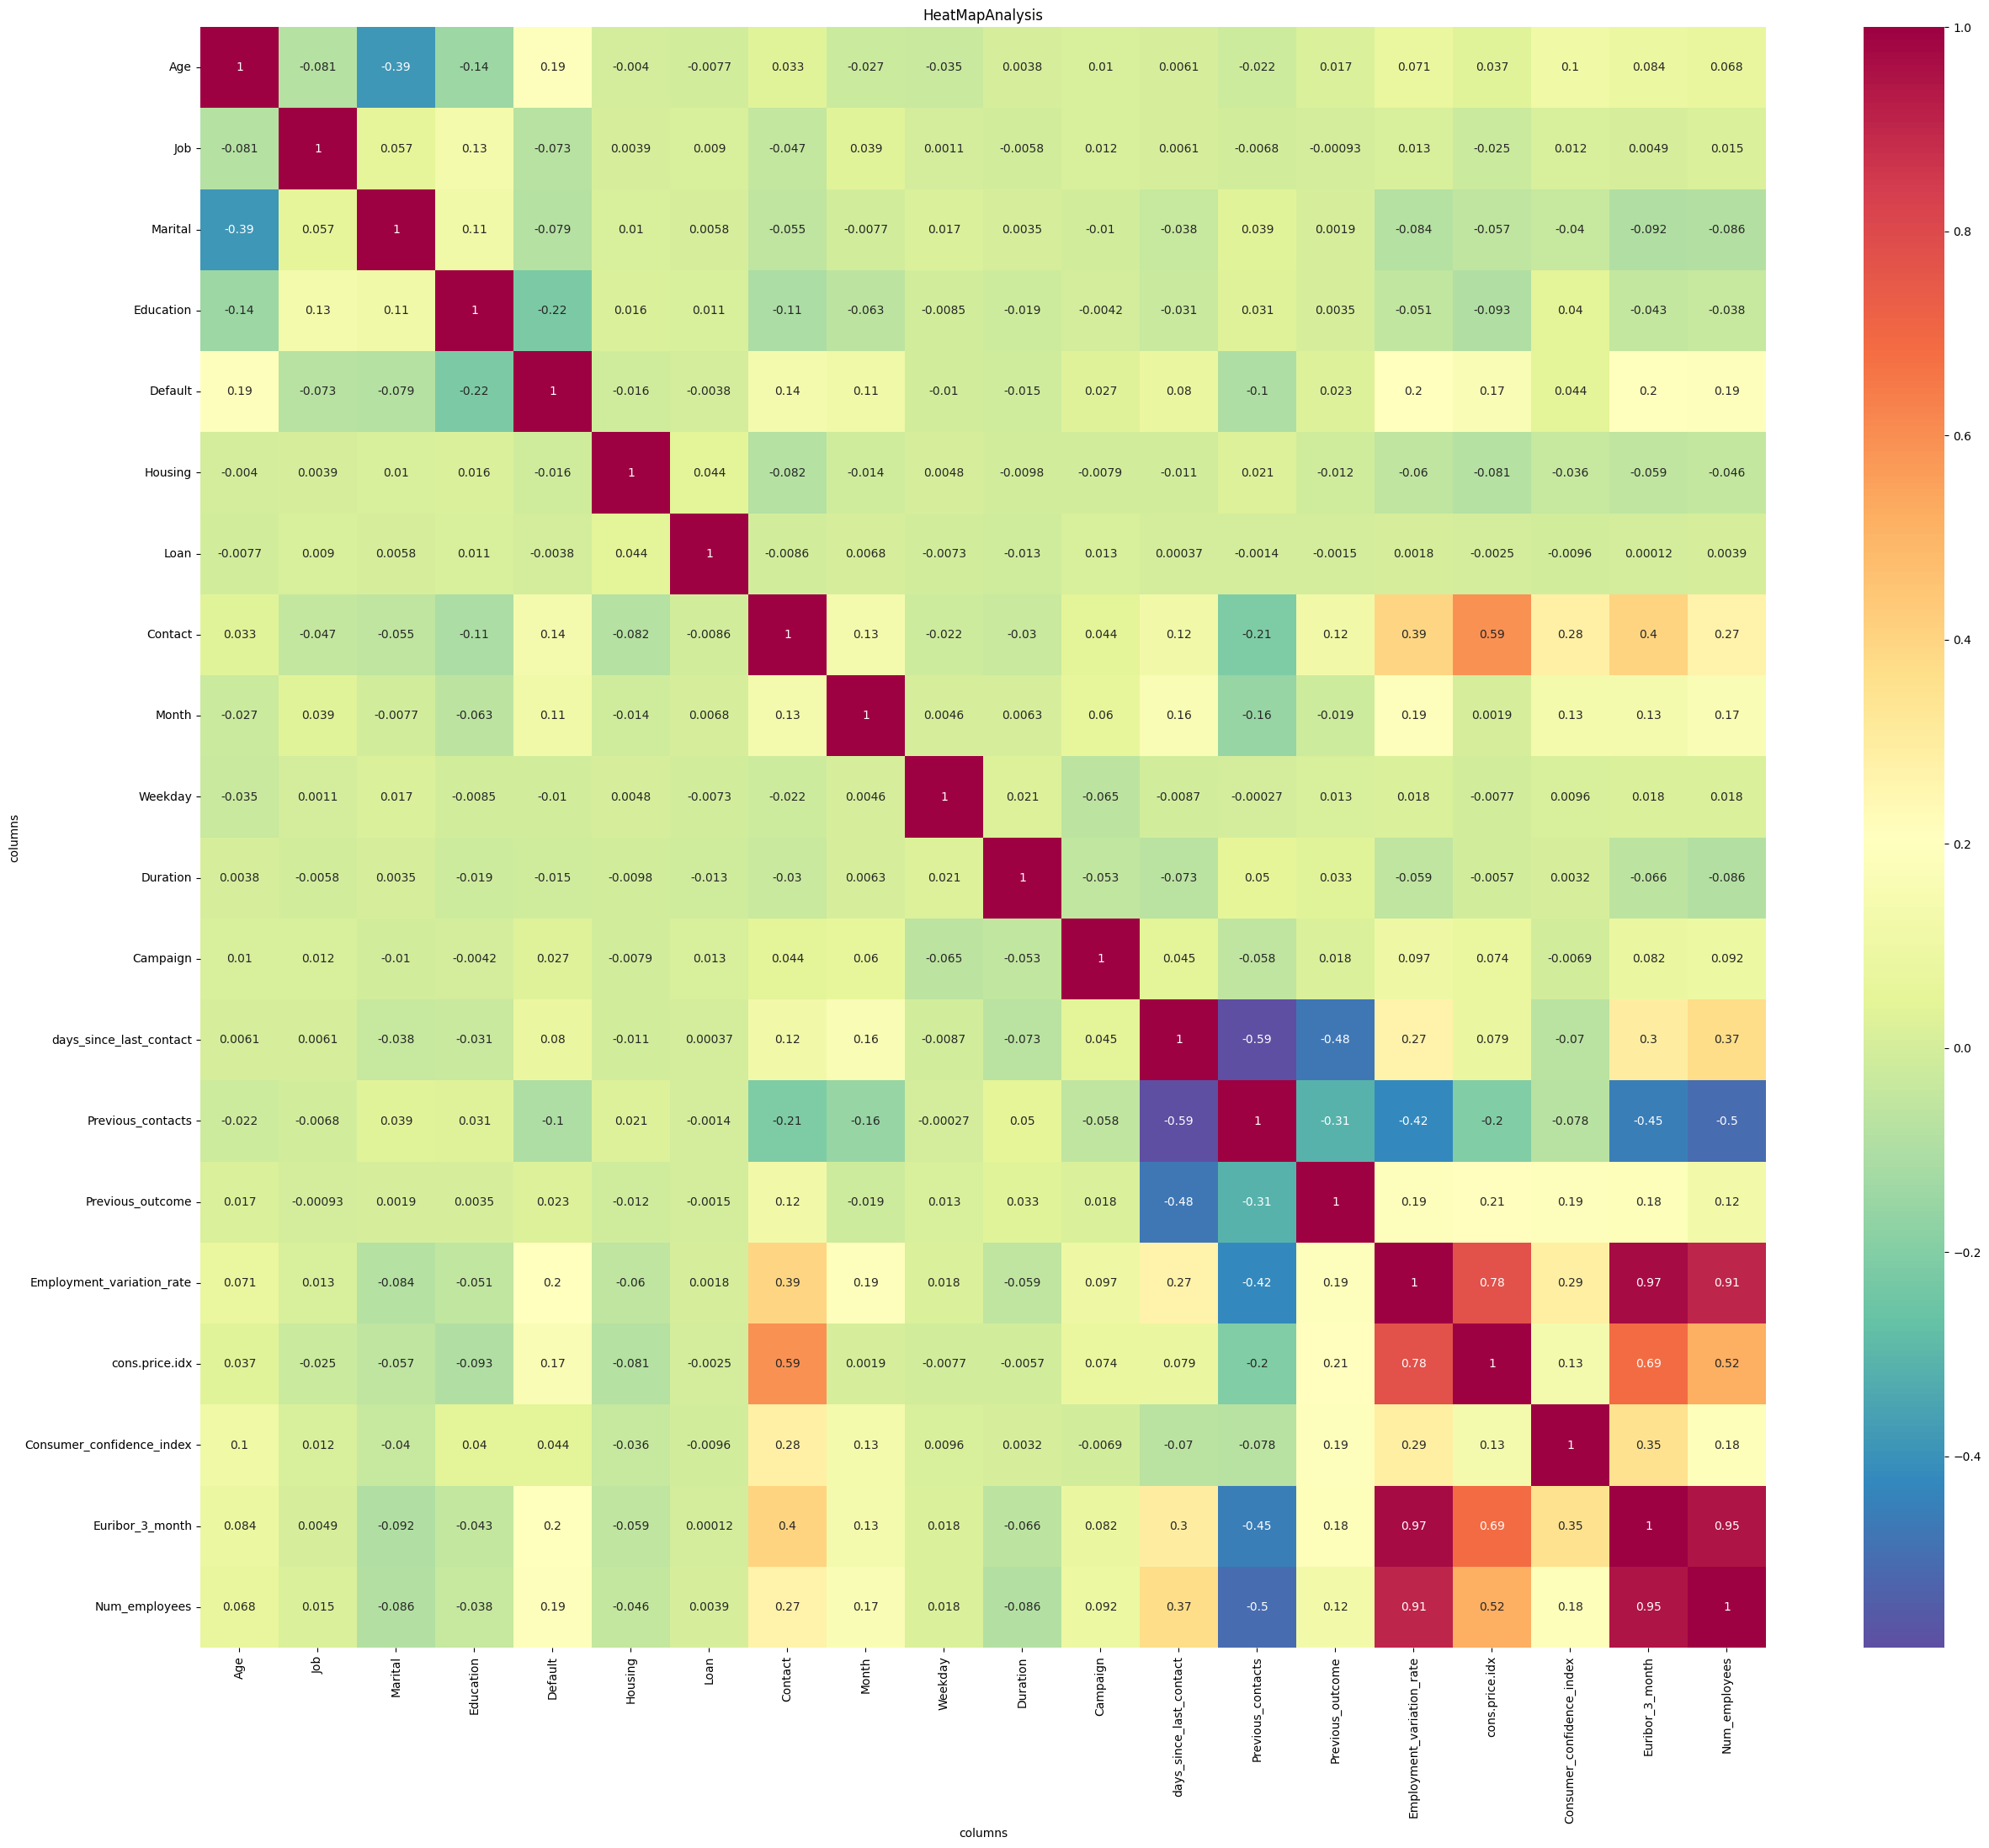

In [308]:
# HeatMapAnalysis
plt.figure(figsize=(30,25))
sns.heatmap(preprocessed_data.drop("Subscription",axis=1).corr(),cmap=plt.cm.Spectral_r,annot=True)
plt.title("HeatMapAnalysis")
plt.xlabel("columns",fontsize=10)
plt.ylabel("columns",fontsize=10)
plt.show()


In [309]:
def correlation(dataset,threshold):
  col_corr=set()
  matrix=dataset.corr()
  for i in range(len(matrix.columns)):
    for j in range(i):
      if(matrix.iloc[i,j]>threshold):
        col_name=matrix.columns[i]
        col_corr.add(col_name)
      return col_corr

In [310]:
features=correlation(preprocessed_data,0.7)
len(set(features))


0

#**Split the Train and Test Datas**

In [311]:
x = preprocessed_data.drop('Subscription', axis=1)  # Features
y = preprocessed_data['Subscription']  # Target

In [312]:
# Applying SelectKBest and f_classifier for selecting the best features

In [314]:
from sklearn.feature_selection import SelectKBest, f_classif
k = 16  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)
best_features = selector.fit(x, y)

# Identify features with low p-values
Irrelevant_features = x.columns[~best_features.get_support()]

In [315]:
# removing the irrelevant columns

In [316]:
data_cleaned = preprocessed_data.drop(columns=Irrelevant_features)


In [318]:
data_cleaned

,Marital,Education,Default,Contact,Month,Weekday,Duration,Campaign,days_since_last_contact,Previous_contacts,Previous_outcome,Employment_variation_rate,cons.price.idx,Consumer_confidence_index,Euribor_3_month,Num_employees,Subscription
0,1,3,0,1,9,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,6,1,1,9,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,6,0,1,9,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,1,1,0,1,9,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,6,0,1,9,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,1,5,0,0,4,1,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41172,1,5,0,0,4,1,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41173,1,7,0,0,4,1,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41174,1,5,0,0,4,1,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


#**Model Building**